# SECTION 0: IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
import shap

C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt import space
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform, randint, uniform

In [3]:
from pyforest import*
lazy_imports()

['from pathlib import Path',
 'from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from PIL import Image',
 'import random',
 'import plotly.express as px',
 'from scipy import stats',
 'from sklearn import metrics',
 'from sklearn.model_selection import KFold',
 'from dask import dataframe as dd',
 'from sklearn.model_selection import train_test_split',
 'import xgboost as xgb',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly as py',
 'from sklearn.linear_model import ElasticNet',
 'import matplotlib as mpl',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import altair as alt',
 'import keras',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.linear_model import Ridge',
 'from sklearn.ensemble import Gradient

# SECTION 1: DATA LOADING

In [4]:
df = pd.read_csv("C:/Users/lucar/Documents/My Documents/03 Uni/02 Bath/02 AIML/Concrete Project/Code/Concrete_Data_1.csv")
df.head()

<IPython.core.display.Javascript object>

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [7]:
#checking for missing values
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [8]:
stats = df.describe().T
stats['mode'] = df.mode().iloc[0]

stats = stats.round(2)
stats = stats[['count', 'mean', 'std', 'min', '50%', 'max', 'mode']]
stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Median', 'Max', 'Mode']
stats.index.name = 'Feature'

print(stats.to_string())


                   Count    Mean  Std Dev     Min  Median     Max   Mode
Feature                                                                 
cement            1030.0  281.17   104.51  102.00  272.90   540.0  362.6
slag              1030.0   73.90    86.28    0.00   22.00   359.4    0.0
ash               1030.0   54.19    64.00    0.00    0.00   200.1    0.0
water             1030.0  181.57    21.35  121.80  185.00   247.0  192.0
superplasticizer  1030.0    6.20     5.97    0.00    6.40    32.2    0.0
coarseagg         1030.0  972.92    77.75  801.00  968.00  1145.0  932.0
fineagg           1030.0  773.58    80.18  594.00  779.50   992.6  594.0
age               1030.0   45.66    63.17    1.00   28.00   365.0   28.0
strength          1030.0   35.82    16.71    2.33   34.44    82.6   33.4


In [9]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 25
     cement   slag  ash  water  superplasticizer  coarseagg  fineagg  age  \
77    425.0  106.3  0.0  153.5              16.5      852.1    887.1    3   
80    425.0  106.3  0.0  153.5              16.5      852.1    887.1    3   
86    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
88    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
91    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
100   425.0  106.3  0.0  153.5              16.5      852.1    887.1    7   
103   425.0  106.3  0.0  153.5              16.5      852.1    887.1    7   
109   362.6  189.0  0.0  164.9              11.6      944.7    755.8    7   
111   362.6  189.0  0.0  164.9              11.6      944.7    755.8    7   
123   425.0  106.3  0.0  153.5              16.5      852.1    887.1   28   
126   425.0  106.3  0.0  153.5              16.5      852.1    887.1   28   
132   362.6  189.0  0.0  164.9              11.

# SECTION 2: UNIVARIATE EDA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement'], ax=ax2[0][0], kde=True)


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag'],ax=ax2[0][1])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash'],ax=ax2[0][2])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['water'],ax=ax2[1][0])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplasticizer'],ax=ax2[1][1])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg'],ax=ax2[1][2])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fineagg'],ax=ax2[2][0])


<IPython.core.display.Javascript object>

C:\Users\lucar\AppData\Local\Temp\ipykernel_139620\1273996386.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],ax=ax2[2][1])


<IPython.core.display.Javascript object>

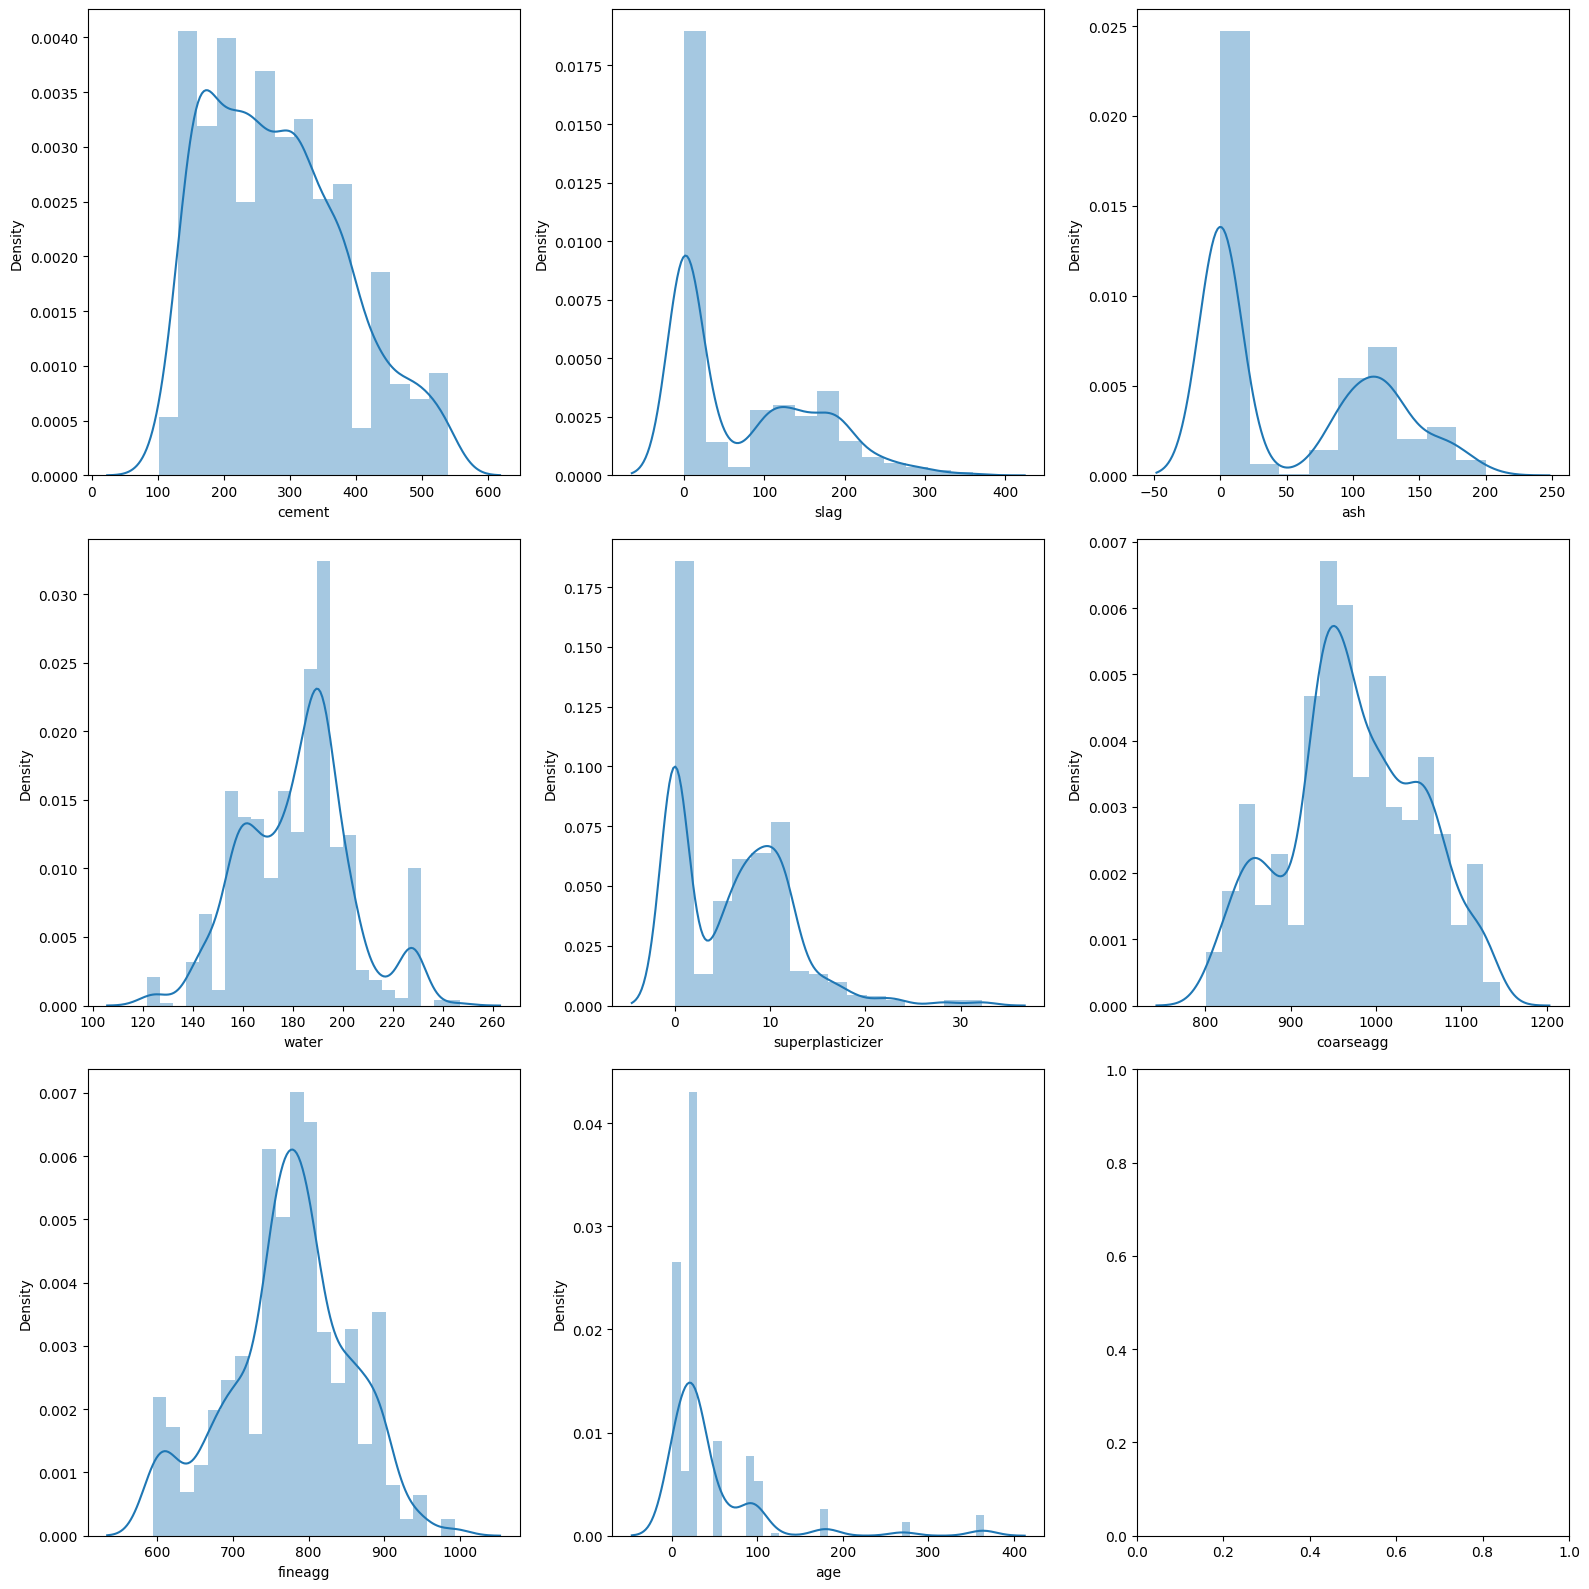

In [10]:
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'], ax=ax2[0][0], kde=True)
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplasticizer'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
plt.tight_layout()

# SECTION 3: OUTLIER DETECTION

In [11]:
def detect_outliers_zscore(df, features, threshold=5, method='zscore'):
    outlier_mask = pd.Series(True, index=df.index)
    outlier_summary = {}
    
    for feature in features:
        if method == 'zscore':
            z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
            outlier_count = (z_scores > threshold).sum()
        
        outlier_summary[feature] = outlier_count
        outlier_mask = outlier_mask & (z_scores <= threshold)
    
    return outlier_mask, outlier_summary

raw_features = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']

outlier_mask, outlier_summary = detect_outliers_zscore(df, raw_features, threshold=5, method='zscore')

print("OUTLIER DETECTION SUMMARY (Z-score method, threshold = 5 SD)")
for feature, count in outlier_summary.items():
    pct = count / len(df) * 100
    print(f"  {feature:25s}: {count:3d} outliers ({pct:5.2f}%)")

print(f"\n{"Total samples with outliers":25s}: {(~outlier_mask).sum()}")
print(f"{"Clean samples":25s}: {outlier_mask.sum()} ({outlier_mask.sum()/len(df)*100:.2f}%)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OUTLIER DETECTION SUMMARY (Z-score method, threshold = 5 SD)
  cement                   :   0 outliers ( 0.00%)
  slag                     :   0 outliers ( 0.00%)
  ash                      :   0 outliers ( 0.00%)
  water                    :   0 outliers ( 0.00%)
  superplasticizer         :   0 outliers ( 0.00%)
  coarseagg                :   0 outliers ( 0.00%)
  fineagg                  :   0 outliers ( 0.00%)
  age                      :  14 outliers ( 1.36%)
  strength                 :   0 outliers ( 0.00%)

Total samples with outliers: 14
Clean samples            : 1016 (98.64%)


# SECTION 4: BOXPLOTS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

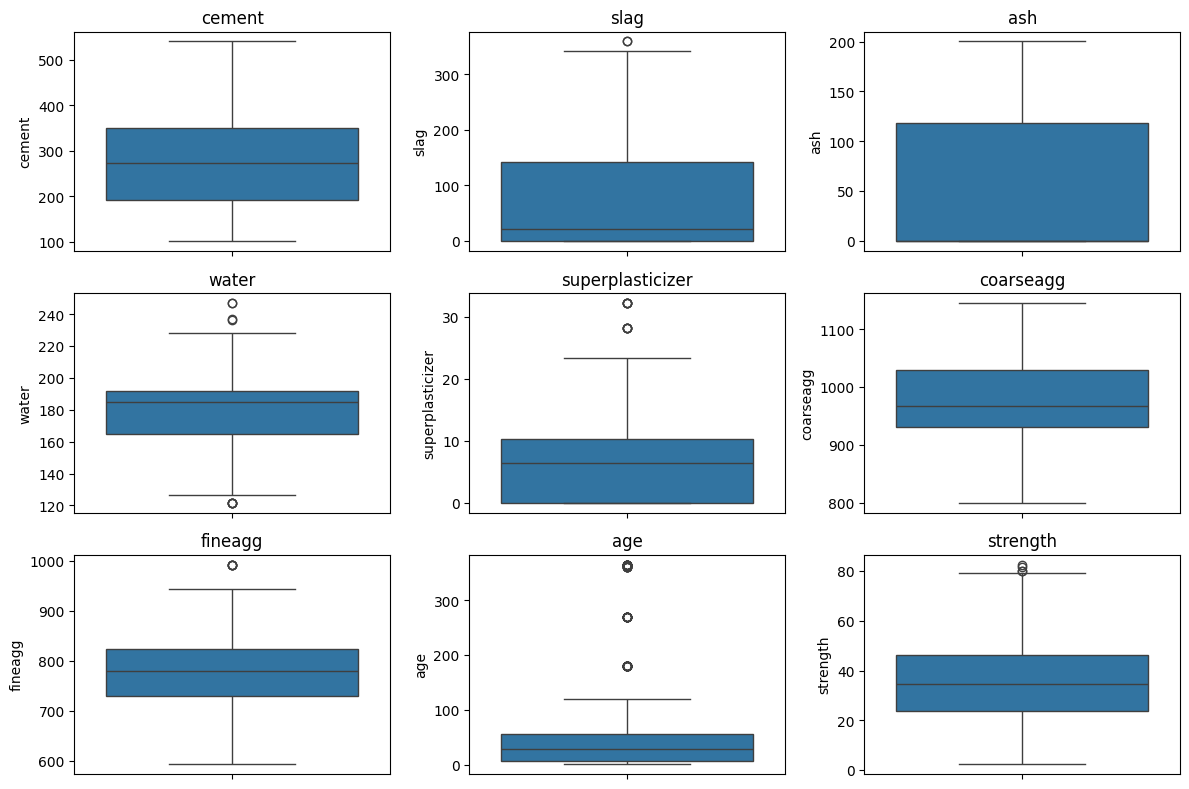

In [12]:
outlier_mask, outlier_summary = detect_outliers_zscore(df, raw_features, threshold=5, method='zscore')

plt.figure(figsize=(12, 8))
for i, col in enumerate(raw_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# SECTION 5: PEARSON CORRELATIONS & EDA MULTIVARIATE ANALYSIS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

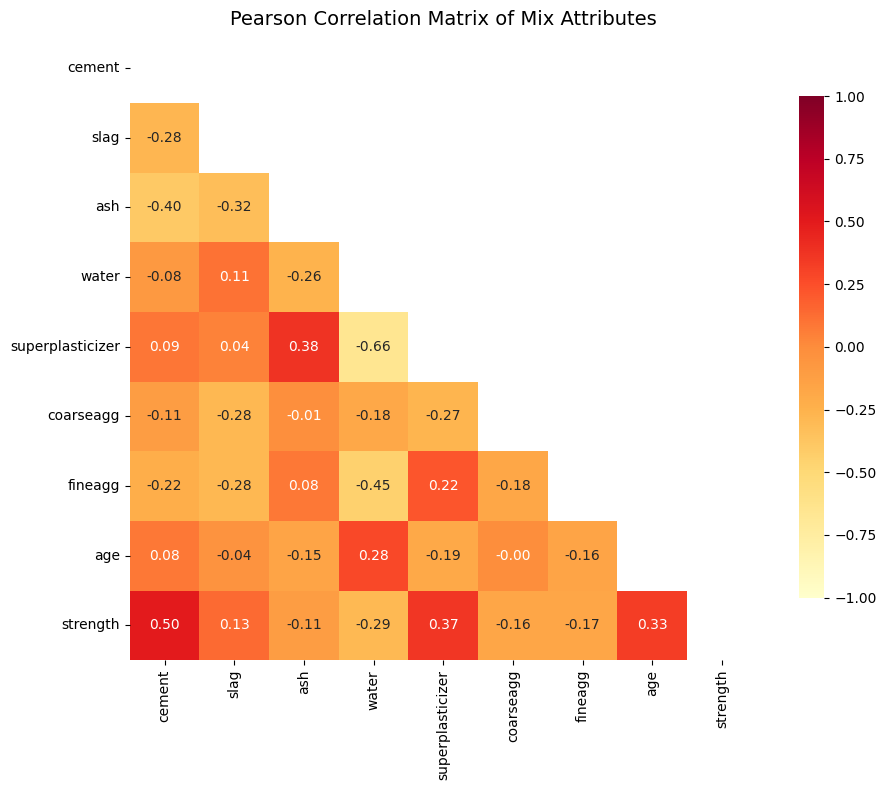

In [13]:
corr = df[raw_features].corr(method='pearson')

plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='YlOrRd', square=True,cbar_kws={"shrink": 0.8})

plt.title('Pearson Correlation Matrix of Mix Attributes', fontsize=14)
plt.tight_layout()
plt.savefig('pearson_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# SECTION 6.1: FEATURE ENGINEERING

In [14]:
df_engineered = df.copy()

#New Ratios between features
df_engineered['water_cement_ratio'] = df['water'] / df['cement']
df_engineered['water_binder_ratio'] = df['water'] / (df['cement'] + df['slag'] + df['ash'])

#Age binning
bins = [0, 1, 3, 7, 14, 28, 56, 90, 180, 365]
labels = ['very_early', 'very_early2', 'early', 'early2', 'week1', 'week2', 'month3', 'month6', 'year1']
df_engineered['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df_engineered['age_bin'] = pd.cut(df['age'], bins=bins, include_lowest=True).cat.codes
#Age indicators
df_engineered['is_very_early'] = (df['age'] <= 3).astype(int)
df_engineered['is_early_cure'] = ((df['age'] > 3) & (df['age'] <= 7)).astype(int)
df_engineered['is_7day'] = (df['age'] == 7).astype(int)
df_engineered['is_28day'] = (df['age'] == 28).astype(int)
df_engineered['is_mature'] = (df['age'] >= 28).astype(int)
df_engineered['is_very_mature'] = (df['age'] >= 90).astype(int)

#Binary Indicators for zero-inflated features
df_engineered['has_slag'] = (df['slag'] > 0).astype(int)
df_engineered['has_ash'] = (df['ash'] > 0).astype(int)
df_engineered['has_superplasticizer'] = (df['superplasticizer'] > 0).astype(int)

print(df_engineered.head())
print(df_engineered.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   cement   slag  ash  water  superplasticizer  coarseagg  fineagg  age  \
0   540.0    0.0  0.0  162.0               2.5     1040.0    676.0   28   
1   540.0    0.0  0.0  162.0               2.5     1055.0    676.0   28   
2   332.5  142.5  0.0  228.0               0.0      932.0    594.0  270   
3   332.5  142.5  0.0  228.0               0.0      932.0    594.0  365   
4   198.6  132.4  0.0  192.0               0.0      978.4    825.5  360   

   strength  water_cement_ratio  ...  age_bin is_very_early  is_early_cure  \
0     79.99            0.300000  ...        4             0              0   
1     61.89            0.300000  ...        4             0              0   
2     40.27            0.685714  ...        8             0              0   
3     41.05            0.685714  ...        8             0              0   
4     44.30            0.966767  ...        8             0              0   

   is_7day  is_28day  is_mature  is_very_mature  has_slag  has_ash  \
0        0

# SECTION 6.2: PEARSON CORRELATION WITH NEW FEATURES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

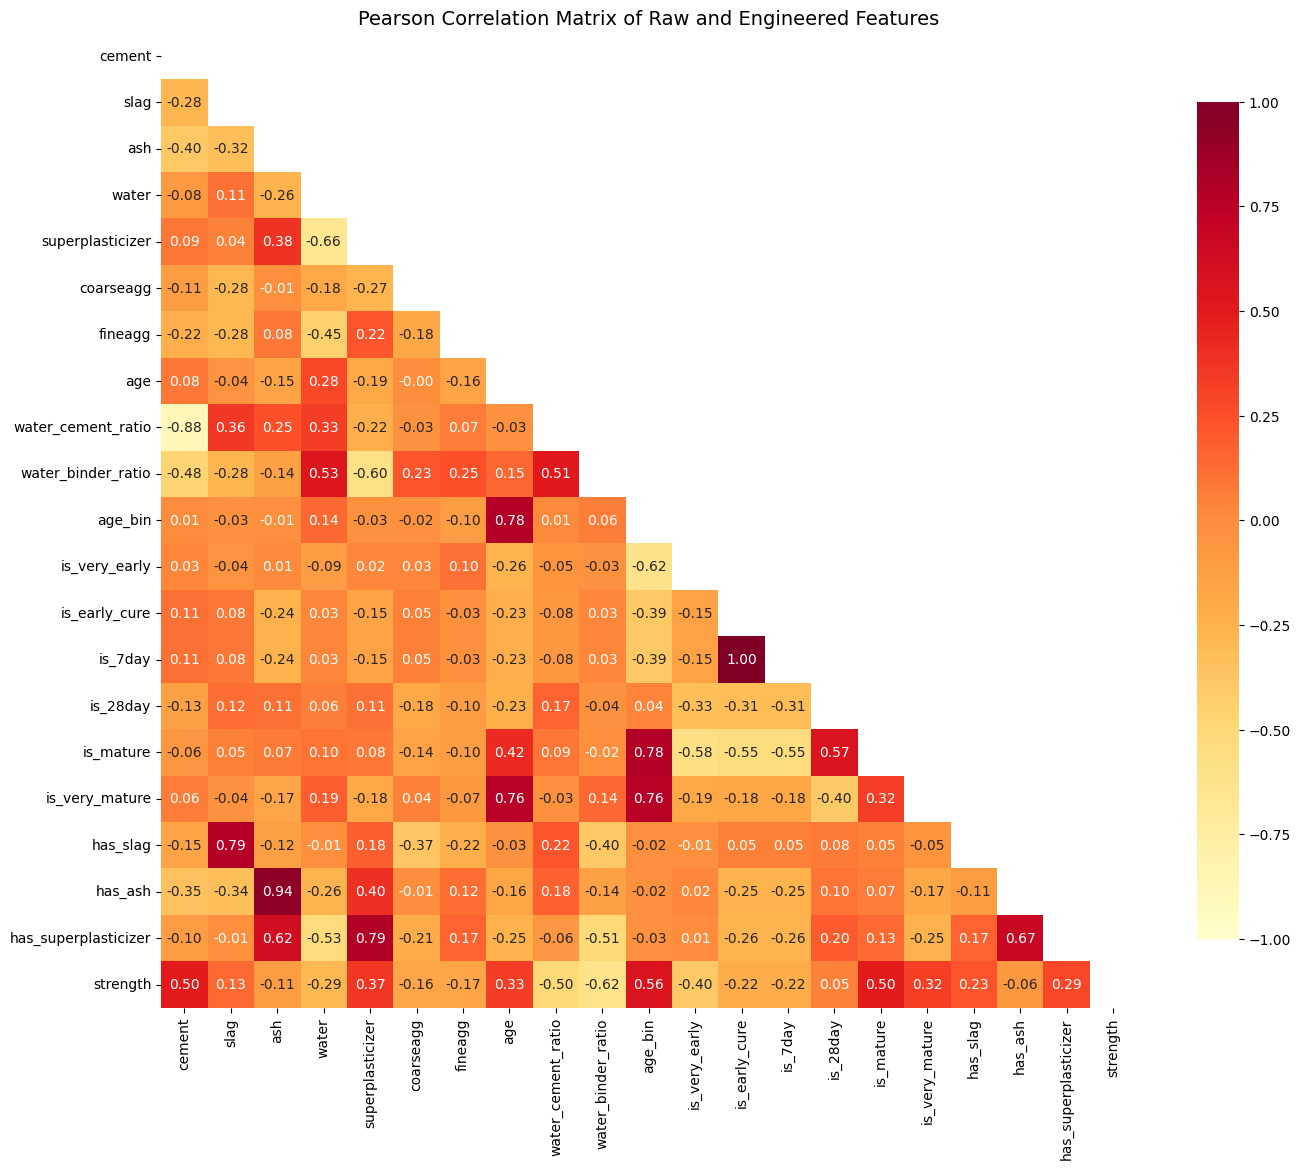

In [15]:
corr_df = df_engineered.select_dtypes(include=['number'])
cols = [c for c in corr_df.columns if c != 'strength'] + ['strength']
corr_df = corr_df[cols]

corr = corr_df.corr(method='pearson')

plt.figure(figsize=(14, 12))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    cmap='YlOrRd',
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title('Pearson Correlation Matrix of Raw and Engineered Features', fontsize=14)
plt.tight_layout()
plt.savefig('pearson_correlation_matrix_engineered.png',dpi=300, bbox_inches='tight')
plt.show()

# SECTION 7: CREATE TWO DATASETS

In [16]:
print("CREATING TWO DATASETS: WITH & WITHOUT OUTLIERS")

# DATASET 1: WITH OUTLIERS (for RF and XGB)
X_with_outliers = df_engineered.drop(columns=['strength', 'age_category', 'age'])
y_with_outliers = df_engineered['strength']

print(f"\nDataset 1 - WITH OUTLIERS (for tree-based models):")
print(f"  Total samples: {len(X_with_outliers)}")
print(f"  Features: {X_with_outliers.shape[1]}")

# DATASET 2: WITHOUT OUTLIERS (for SVR)
df_clean = df_engineered[outlier_mask].copy()
X_without_outliers = df_clean.drop(columns=['strength', 'age_category', 'age'])
y_without_outliers = df_clean['strength']

print(f"\nDataset 2 - WITHOUT OUTLIERS (for SVR):")
print(f"  Clean samples: {len(X_without_outliers)}")
print(f"  Features: {X_without_outliers.shape[1]}")
print(f"  Outliers removed: {len(X_with_outliers) - len(X_without_outliers)}")

CREATING TWO DATASETS: WITH & WITHOUT OUTLIERS

Dataset 1 - WITH OUTLIERS (for tree-based models):
  Total samples: 1030
  Features: 19

Dataset 2 - WITHOUT OUTLIERS (for SVR):
  Clean samples: 1016
  Features: 19
  Outliers removed: 14


# SECTION 8: CREATE TWO-WAY SPLITS, TRAIN/TEST

In [17]:
# DATASET 1: WITH OUTLIERS (for RF and XGB)
print("Dataset 1: TRAIN/TEST SPLIT WITH OUTLIERS (Random Forest & XGBoost)")

# Split 80% 20% 
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

print(f"Train set: {X_train_with.shape[0]} samples (80%)")
print(f"Test set:  {X_test_with.shape[0]} samples (20%)")

# DATASET 2: WITHOUT OUTLIERS (for SVR)
print("\nDataset 2: TRAIN/TEST SPLIT WITH  WITHOUT OUTLIERS (SVR)")

# Split 80% 20%
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_without_outliers, y_without_outliers, test_size=0.2, random_state=42)

print(f"Train set: {X_train_clean.shape[0]} samples (80%)")
print(f"Test set:  {X_test_clean.shape[0]} samples (20%)")

Dataset 1: TRAIN/TEST SPLIT WITH OUTLIERS (Random Forest & XGBoost)


<IPython.core.display.Javascript object>

Train set: 824 samples (80%)
Test set:  206 samples (20%)

Dataset 2: TRAIN/TEST SPLIT WITH  WITHOUT OUTLIERS (SVR)


<IPython.core.display.Javascript object>

Train set: 812 samples (80%)
Test set:  204 samples (20%)


# SECTION 9: RANDOM FOREST

# SECTION 9.1: RF - BAYESIAN OPTIMIZATION 

In [35]:
# Pipeline (No scaler needed for RF)
rf_pipe = Pipeline([('rf', RandomForestRegressor(random_state=42, n_jobs=-1))])

# Define Bayesian search space
search_space_rf_bayes = {
    'rf__n_estimators': Integer(300, 800),
    'rf__max_depth': Integer(5, 25),
    'rf__min_samples_split': Integer(2, 12),
    'rf__min_samples_leaf': Integer(1, 8),
    'rf__max_features': Categorical(['sqrt', 'log2', 0.5, 0.7])
}

# Bayesian Optimization
print("\nPerforming Bayesian Optimization (Random Forest)...")
start_time = time.time()

bayes_search_rf = BayesSearchCV(
    estimator=rf_pipe,
    search_spaces=search_space_rf_bayes,
    n_iter=40,              
    cv=5,                   
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search_rf.fit(X_train_with, y_train_with)
elapsed_time = time.time() - start_time

# Results
print("Random Forest - Bayesian Optimization Results")
print(f"\nBest Parameters Found:")
print(f"  n_estimators: {bayes_search_rf.best_params_['rf__n_estimators']}")
print(f"  max_depth: {bayes_search_rf.best_params_['rf__max_depth']}")
print(f"  min_samples_split: {bayes_search_rf.best_params_['rf__min_samples_split']}")
print(f"  min_samples_leaf: {bayes_search_rf.best_params_['rf__min_samples_leaf']}")

print(f"\nBest CV R² Score: {bayes_search_rf.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Best model
best_rf_bayes = bayes_search_rf.best_estimator_

# Predictions
print("\nMaking predictions...")
rf_train_pred_bayes = best_rf_bayes.predict(X_train_with)
rf_test_pred_bayes = best_rf_bayes.predict(X_test_with)

# Metrics
# Train
rf_train_rmse_bayes = np.sqrt(mean_squared_error(y_train_with, rf_train_pred_bayes))
rf_train_mae_bayes  = mean_absolute_error(y_train_with, rf_train_pred_bayes)
rf_train_r2_bayes   = r2_score(y_train_with, rf_train_pred_bayes)
rf_train_mape_bayes = np.mean(np.abs((y_train_with - rf_train_pred_bayes) / y_train_with)) * 100

# Test
rf_test_rmse_bayes = np.sqrt(mean_squared_error(y_test_with, rf_test_pred_bayes))
rf_test_mae_bayes  = mean_absolute_error(y_test_with, rf_test_pred_bayes)
rf_test_r2_bayes   = r2_score(y_test_with, rf_test_pred_bayes)
rf_test_mape_bayes = np.mean(np.abs((y_test_with - rf_test_pred_bayes) / y_test_with)) * 100

print("Random Forest Bayesian Optimization Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {rf_train_rmse_bayes:.4f} MPa")
print(f"  MAE:  {rf_train_mae_bayes:.4f} MPa")
print(f"  MAPE: {rf_train_mape_bayes:.2f}%")
print(f"  R²:   {rf_train_r2_bayes:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {rf_test_rmse_bayes:.4f} MPa")
print(f"  MAE:  {rf_test_mae_bayes:.4f} MPa")
print(f"  MAPE: {rf_test_mape_bayes:.2f}%")
print(f"  R²:   {rf_test_r2_bayes:.4f}")

rf_cv_results = bayes_search_rf.cv_results_
rf_mean_cv_r2 = rf_cv_results['mean_test_score'][bayes_search_rf.best_index_]
rf_std_cv_r2  = rf_cv_results['std_test_score'][bayes_search_rf.best_index_]
 
print(f"Best config CV R² (Random Forest): {rf_mean_cv_r2:.4f} ± {rf_std_cv_r2:.4f}")

<IPython.core.display.Javascript object>


Performing Bayesian Optimization (Random Forest)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Bayesian Optimization Performance

Training Set:
  RMSE: 1.9083 MPa
  MAE:  1.2505 MPa
  MAPE: 4.47%
  R²:   0.9872

Test Set:
  RMSE: 4.9352 MPa
  MAE:  3.4685 MPa
  MAPE: 11.18%
  R²:   0.9055


# SECTION 9.2: RF - GRIDSEARCHCV

In [36]:
# Pipeline (no scaler needed for RF)
rf_pipe = Pipeline([('rf', RandomForestRegressor(random_state=42, n_jobs=-1))])

# Grid search space
search_space_grid_rf = {
    'rf__n_estimators': [300, 500, 800],        
    'rf__max_depth': [5, 10, 15, 20, 25],
    'rf__min_samples_split': [2, 4, 8, 12],
    'rf__min_samples_leaf': [1, 2, 4, 8],
    'rf__max_features': ['sqrt', 'log2', 0.5, 0.7]
}

# Grid Search
print("\nPerforming Grid Search (Random Forest)...")
start_time = time.time()

grid_search_rf = GridSearchCV(
    estimator=rf_pipe,
    param_grid=search_space_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_with, y_train_with)
elapsed_time = time.time() - start_time

# Results
print("Random Forest - Grid Search Results")
print(f"\nBest Parameters Found:")
print(f"  n_estimators: {grid_search_rf.best_params_['rf__n_estimators']}")
print(f"  max_depth: {grid_search_rf.best_params_['rf__max_depth']}")
print(f"  min_samples_split: {grid_search_rf.best_params_['rf__min_samples_split']}")
print(f"  min_samples_leaf: {grid_search_rf.best_params_['rf__min_samples_leaf']}")

print(f"\nBest CV R² Score: {grid_search_rf.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Best model
best_rf_grid = grid_search_rf.best_estimator_

# Predictions
print("\nMaking predictions...")
rf_train_pred_grid = best_rf_grid.predict(X_train_with)
rf_test_pred_grid = best_rf_grid.predict(X_test_with)

# Metrics
# Train
rf_train_rmse_grid = np.sqrt(mean_squared_error(y_train_with, rf_train_pred_grid))
rf_train_mae_grid  = mean_absolute_error(y_train_with, rf_train_pred_grid)
rf_train_r2_grid   = r2_score(y_train_with, rf_train_pred_grid)
rf_train_mape_grid = np.mean(np.abs((y_train_with - rf_train_pred_grid) / y_train_with)) * 100

# Test
rf_test_rmse_grid = np.sqrt(mean_squared_error(y_test_with, rf_test_pred_grid))
rf_test_mae_grid  = mean_absolute_error(y_test_with, rf_test_pred_grid)
rf_test_r2_grid   = r2_score(y_test_with, rf_test_pred_grid)
rf_test_mape_grid = np.mean(np.abs((y_test_with - rf_test_pred_grid) / y_test_with)) * 100

print("Random Forest Grid Search Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {rf_train_rmse_grid:.4f} MPa")
print(f"  MAE:  {rf_train_mae_grid:.4f} MPa")
print(f"  MAPE: {rf_train_mape_grid:.2f}%")
print(f"  R²:   {rf_train_r2_grid:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {rf_test_rmse_grid:.4f} MPa")
print(f"  MAE:  {rf_test_mae_grid:.4f} MPa")
print(f"  MAPE: {rf_test_mape_grid:.2f}%")
print(f"  R²:   {rf_test_r2_grid:.4f}")

<IPython.core.display.Javascript object>


Performing Grid Search (Random Forest)...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Random Forest - Grid Search Results

Best Parameters Found:
  n_estimators: 500
  max_depth: 15
  min_samples_split: 2
  min_samples_leaf: 1

Best CV R² Score: 0.9158
Search Time: 43.01 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Grid Search Performance

Training Set:
  RMSE: 1.9106 MPa
  MAE:  1.2475 MPa
  MAPE: 4.47%
  R²:   0.9872

Test Set:
  RMSE: 4.9178 MPa
  MAE:  3.4800 MPa
  MAPE: 11.26%
  R²:   0.9061


# SECTION 9.3: RF - RANDOMSEARCHCV

In [37]:
# Pipeline (no scaler needed for RF)
rf_pipe = Pipeline([('rf', RandomForestRegressor(random_state=42, n_jobs=-1))])

# Random search space 
search_space_rf_random= {
    'rf__n_estimators': [300, 500, 800],       
    'rf__max_depth': [5, 10, 15, 20, 25],
    'rf__min_samples_split': [2, 4, 8, 12],
    'rf__min_samples_leaf': [1, 2, 4, 8],
    'rf__max_features': ['sqrt', 'log2', 0.5, 0.7]
}

# Random Search
print("\nPerforming Random Search (Random Forest)...")
start_time = time.time()

random_search_rf = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=search_space_rf_random,
    n_iter=40,         
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_rf.fit(X_train_with, y_train_with)
elapsed_time = time.time() - start_time

# Results
print("Random Forest - Random Search Results")
print(f"\nBest Parameters Found:")
print(f"  n_estimators: {random_search_rf.best_params_['rf__n_estimators']}")
print(f"  max_depth: {random_search_rf.best_params_['rf__max_depth']}")
print(f"  min_samples_split: {random_search_rf.best_params_['rf__min_samples_split']}")
print(f"  min_samples_leaf: {random_search_rf.best_params_['rf__min_samples_leaf']}")

print(f"\nBest CV R² Score: {random_search_rf.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Best model
best_rf_random = random_search_rf.best_estimator_

# Predictions
print("\nMaking predictions...")
rf_train_pred_random = best_rf_random.predict(X_train_with)
rf_test_pred_random = best_rf_random.predict(X_test_with)

# Metrics
# Train
rf_train_rmse_random = np.sqrt(mean_squared_error(y_train_with, rf_train_pred_random))
rf_train_mae_random  = mean_absolute_error(y_train_with, rf_train_pred_random)
rf_train_r2_random   = r2_score(y_train_with, rf_train_pred_random)
rf_train_mape_random = np.mean(np.abs((y_train_with - rf_train_pred_random) / y_train_with)) * 100

# Test
rf_test_rmse_random = np.sqrt(mean_squared_error(y_test_with, rf_test_pred_random))
rf_test_mae_random  = mean_absolute_error(y_test_with, rf_test_pred_random)
rf_test_r2_random   = r2_score(y_test_with, rf_test_pred_random)
rf_test_mape_random = np.mean(np.abs((y_test_with - rf_test_pred_random) / y_test_with)) * 100

print("Random Forest Random Search Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {rf_train_rmse_random:.4f} MPa")
print(f"  MAE:  {rf_train_mae_random:.4f} MPa")
print(f"  MAPE: {rf_train_mape_random:.2f}%")
print(f"  R²:   {rf_train_r2_random:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {rf_test_rmse_random:.4f} MPa")
print(f"  MAE:  {rf_test_mae_random:.4f} MPa")
print(f"  MAPE: {rf_test_mape_random:.2f}%")
print(f"  R²:   {rf_test_r2_random:.4f}")

<IPython.core.display.Javascript object>


Performing Random Search (Random Forest)...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Random Forest - Random Search Results

Best Parameters Found:
  n_estimators: 300
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1

Best CV R² Score: 0.9149
Search Time: 1.66 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Random Search Performance

Training Set:
  RMSE: 1.8904 MPa
  MAE:  1.2298 MPa
  MAPE: 4.37%
  R²:   0.9874

Test Set:
  RMSE: 4.9118 MPa
  MAE:  3.4832 MPa
  MAPE: 11.28%
  R²:   0.9064


# SECTION 9.4: RF HYPERPARAMETER TEST COMPARISON

In [38]:
comparison_data_rf = {
    'Method': ['Bayesian Optimization', 'Grid Search', 'Random Search'],
    'Best CV R²': [
        f"{bayes_search_rf.best_score_:.4f}",
        f"{grid_search_rf.best_score_:.4f}",
        f"{random_search_rf.best_score_:.4f}"
    ],
    'Train R²': [
        f"{rf_train_r2_bayes:.4f}",
        f"{rf_train_r2_grid:.4f}",
        f"{rf_train_r2_random:.4f}"
    ],
    'Train RMSE (MPa)': [
        f"{rf_train_rmse_bayes:.4f}",
        f"{rf_train_rmse_grid:.4f}",
        f"{rf_train_rmse_random:.4f}"
    ],
    'Train MAE (MPa)': [
        f"{rf_train_mae_bayes:.4f}",
        f"{rf_train_mae_grid:.4f}",
        f"{rf_train_mae_random:.4f}"
    ],
    'Train MAPE (%)': [
        f"{rf_train_mape_bayes:.2f}",
        f"{rf_train_mape_grid:.2f}",
        f"{rf_train_mape_random:.2f}"
    ],
    'Test R²': [
        f"{rf_test_r2_bayes:.4f}",
        f"{rf_test_r2_grid:.4f}",
        f"{rf_test_r2_random:.4f}"
    ],
    'Test RMSE (MPa)': [
        f"{rf_test_rmse_bayes:.4f}",
        f"{rf_test_rmse_grid:.4f}",
        f"{rf_test_rmse_random:.4f}"
    ],
    'Test MAE (MPa)': [
        f"{rf_test_mae_bayes:.4f}",
        f"{rf_test_mae_grid:.4f}",
        f"{rf_test_mae_random:.4f}"
    ],
    'Test MAPE (%)': [
        f"{rf_test_mape_bayes:.2f}",
        f"{rf_test_mape_grid:.2f}",
        f"{rf_test_mape_random:.2f}"
    ]
}

comp_df_rf = pd.DataFrame(comparison_data_rf)
print(comp_df_rf.to_string(index=False))

<IPython.core.display.Javascript object>

               Method Best CV R² Train R² Train RMSE (MPa) Train MAE (MPa) Train MAPE (%) Test R² Test RMSE (MPa) Test MAE (MPa) Test MAPE (%)
Bayesian Optimization     0.9153   0.9872           1.9083          1.2505           4.47  0.9055          4.9352         3.4685         11.18
          Grid Search     0.9158   0.9872           1.9106          1.2475           4.47  0.9061          4.9178         3.4800         11.26
        Random Search     0.9149   0.9874           1.8904          1.2298           4.37  0.9064          4.9118         3.4832         11.28


# SECTION 10: XGBOOST

# SECTION 10.1: XGBOOST - BAYESIAN OPTIMIZATION 

In [18]:
# Pipeline (no scaler needed for XGB)
xgb_pipe = Pipeline([('xgb', XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1,verbosity=0))])

# Bayesian search space 
search_space_xgb_bayes = {
    'xgb__n_estimators': Integer(300, 900),
    'xgb__max_depth': Integer(2, 5),
    'xgb__learning_rate': Real(0.01, 0.08),
    'xgb__reg_alpha': Real(0.5, 5.0),
    'xgb__reg_lambda': Real(5.0, 50.0),
}

print("\nPerforming Bayesian Optimization (XGBoost)...")
start_time = time.time()

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_pipe,
    search_spaces=search_space_xgb_bayes,
    n_iter=40,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search_xgb.fit(X_train_with, y_train_with)
elapsed_time_bayes = time.time() - start_time

print("XGBoost - Bayesian Optimization Results")
print(f"\nBest Parameters Found (BayesSearchCV):")
for param, value in bayes_search_xgb.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nBest CV R² Score (BayesSearchCV): {bayes_search_xgb.best_score_:.4f}")
print(f"Search Time: {elapsed_time_bayes:.2f} seconds ({elapsed_time_bayes/60:.2f} minutes)")

# Best model
best_xgb_bayes = bayes_search_xgb.best_estimator_

# Predictions
print("\nMaking predictions with best BayesSearchCV model...")
xgb_bayes_train_pred = best_xgb_bayes.predict(X_train_with)
xgb_bayes_test_pred  = best_xgb_bayes.predict(X_test_with)

# Metrics
# Train
xgb_bayes_train_rmse = np.sqrt(mean_squared_error(y_train_with, xgb_bayes_train_pred))
xgb_bayes_train_mae  = mean_absolute_error(y_train_with, xgb_bayes_train_pred)
xgb_bayes_train_r2   = r2_score(y_train_with, xgb_bayes_train_pred)
xgb_bayes_train_mape = np.mean(np.abs((y_train_with - xgb_bayes_train_pred) / y_train_with)) * 100

# Test
xgb_bayes_test_rmse = np.sqrt(mean_squared_error(y_test_with, xgb_bayes_test_pred))
xgb_bayes_test_mae  = mean_absolute_error(y_test_with, xgb_bayes_test_pred)
xgb_bayes_test_r2   = r2_score(y_test_with, xgb_bayes_test_pred)
xgb_bayes_test_mape = np.mean(np.abs((y_test_with - xgb_bayes_test_pred) / y_test_with)) * 100

print("\nXGBoost Bayesian Optimization Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {xgb_bayes_train_rmse:.4f} MPa")
print(f"  MAE:  {xgb_bayes_train_mae:.4f} MPa")
print(f"  MAPE: {xgb_bayes_train_mape:.2f}%")
print(f"  R²:   {xgb_bayes_train_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {xgb_bayes_test_rmse:.4f} MPa")
print(f"  MAE:  {xgb_bayes_test_mae:.4f} MPa")
print(f"  MAPE: {xgb_bayes_test_mape:.2f}%")
print(f"  R²:   {xgb_bayes_test_r2:.4f}")

xgb_cv_results = bayes_search_xgb.cv_results_
xgb_mean_cv_r2 = xgb_cv_results['mean_test_score'][bayes_search_xgb.best_index_]
xgb_std_cv_r2  = xgb_cv_results['std_test_score'][bayes_search_xgb.best_index_]
 
print(f"Best config CV R² (XGBoost): {xgb_mean_cv_r2:.4f} ± {xgb_std_cv_r2:.4f}")


Performing Bayesian Optimization (XGBoost)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost Bayesian Optimization Performance

Training Set:
  RMSE: 1.9138 MPa
  MAE:  1.2587 MPa
  MAPE: 4.51%
  R²:   0.9871

Test Set:
  RMSE: 4.3413 MPa
  MAE:  2.9262 MPa
  MAPE: 9.31%
  R²:   0.9269
Best config CV R² (XGBoost): 0.9291 ± 0.0186


# SECTION 10.2: XGBOOST - GRIDSEARCHCV

In [40]:
# Pipeline (no scaler needed for XGB)
xgb_pipe = Pipeline([('xgb', XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1,verbosity=0))])

# Grid search space
search_space_grid_xgb = {
    'xgb__n_estimators': [300, 600, 900],
    'xgb__max_depth':    [2, 3, 4, 5],
    'xgb__learning_rate': [0.01, 0.03, 0.05, 0.08],
    'xgb__reg_alpha':    [0.5, 1.0, 2.5, 5.0],
    'xgb__reg_lambda':   [5.0, 10.0, 25.0, 50.0],
}

print("\nPerforming GridSearchCV (XGBoost)...")
start_time = time.time()

grid_search_xgb = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=search_space_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_with, y_train_with)
elapsed_time_grid = time.time() - start_time

print("XGBoost - GridSearchCV Results")
print(f"\nBest Parameters Found (GridSearchCV):")
for param, value in grid_search_xgb.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nBest CV R² Score (GridSearchCV): {grid_search_xgb.best_score_:.4f}")
print(f"Search Time: {elapsed_time_grid:.2f} seconds ({elapsed_time_grid/60:.2f} minutes)")

# Best model
best_xgb_grid = grid_search_xgb.best_estimator_

# Predictions
print("\nMaking predictions with best GridSearchCV model...")
xgb_grid_train_pred = best_xgb_grid.predict(X_train_with)
xgb_grid_test_pred  = best_xgb_grid.predict(X_test_with)

# Metrics
# Train
xgb_grid_train_rmse = np.sqrt(mean_squared_error(y_train_with, xgb_grid_train_pred))
xgb_grid_train_mae  = mean_absolute_error(y_train_with, xgb_grid_train_pred)
xgb_grid_train_r2   = r2_score(y_train_with, xgb_grid_train_pred)
xgb_grid_train_mape = np.mean(np.abs((y_train_with - xgb_grid_train_pred) / y_train_with)) * 100

# Test
xgb_grid_test_rmse = np.sqrt(mean_squared_error(y_test_with, xgb_grid_test_pred))
xgb_grid_test_mae  = mean_absolute_error(y_test_with, xgb_grid_test_pred)
xgb_grid_test_r2   = r2_score(y_test_with, xgb_grid_test_pred)
xgb_grid_test_mape = np.mean(np.abs((y_test_with - xgb_grid_test_pred) / y_test_with)) * 100

print("\nXGBoost GridSearchCV Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {xgb_grid_train_rmse:.4f} MPa")
print(f"  MAE:  {xgb_grid_train_mae:.4f} MPa")
print(f"  MAPE: {xgb_grid_train_mape:.2f}%")
print(f"  R²:   {xgb_grid_train_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {xgb_grid_test_rmse:.4f} MPa")
print(f"  MAE:  {xgb_grid_test_mae:.4f} MPa")
print(f"  MAPE: {xgb_grid_test_mape:.2f}%")
print(f"  R²:   {xgb_grid_test_r2:.4f}")


Performing GridSearchCV (XGBoost)...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
XGBoost - GridSearchCV Results

Best Parameters Found (GridSearchCV):
  • xgb__learning_rate: 0.08
  • xgb__max_depth: 4
  • xgb__n_estimators: 900
  • xgb__reg_alpha: 0.5
  • xgb__reg_lambda: 25.0

Best CV R² Score (GridSearchCV): 0.9302
Search Time: 544.15 seconds (9.07 minutes)

Making predictions with best GridSearchCV model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost GridSearchCV Performance

Training Set:
  RMSE: 1.9203 MPa
  MAE:  1.2621 MPa
  MAPE: 4.54%
  R²:   0.9870

Test Set:
  RMSE: 4.2901 MPa
  MAE:  2.8289 MPa
  MAPE: 8.99%
  R²:   0.9286


# SECTION 10.3: XGBOOST - RANDOMSEARCHCV

In [41]:
# Pipeline (no scaler needed for XGB)
xgb_pipe = Pipeline([('xgb', XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1,verbosity=0))])

# Random search space
search_space_xgb_random = {
    'xgb__n_estimators': [300, 600, 900],
    'xgb__max_depth':    [2, 3, 4, 5],
    'xgb__learning_rate': [0.01, 0.03, 0.05, 0.08],
    'xgb__reg_alpha':    [0.5, 1.0, 2.5, 5.0],
    'xgb__reg_lambda':   [5.0, 10.0, 25.0, 50.0],
}

print("\nPerforming RandomizedSearchCV (XGBoost)...")
start_time = time.time()

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=search_space_xgb_random,
    n_iter=40,        
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_xgb.fit(X_train_with, y_train_with)
elapsed_time_rand = time.time() - start_time

print("XGBoost - RandomizedSearchCV Results")
print(f"\nBest Parameters Found (RandomizedSearchCV):")
for param, value in random_search_xgb.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nBest CV R² Score (RandomizedSearchCV): {random_search_xgb.best_score_:.4f}")
print(f"Search Time: {elapsed_time_rand:.2f} seconds ({elapsed_time_rand/60:.2f} minutes)")

# Best model
best_xgb_random = random_search_xgb.best_estimator_

# Predictions
print("\nMaking predictions with best RandomizedSearchCV model...")
xgb_random_train_pred = best_xgb_random.predict(X_train_with)
xgb_random_test_pred  = best_xgb_random.predict(X_test_with)

# Metrics
# Train
xgb_random_train_rmse = np.sqrt(mean_squared_error(y_train_with, xgb_random_train_pred))
xgb_random_train_mae  = mean_absolute_error(y_train_with, xgb_random_train_pred)
xgb_random_train_r2   = r2_score(y_train_with, xgb_random_train_pred)
xgb_random_train_mape = np.mean(np.abs((y_train_with - xgb_random_train_pred) / y_train_with)) * 100

# Test
xgb_random_test_rmse = np.sqrt(mean_squared_error(y_test_with, xgb_random_test_pred))
xgb_random_test_mae  = mean_absolute_error(y_test_with, xgb_random_test_pred)
xgb_random_test_r2   = r2_score(y_test_with, xgb_random_test_pred)
xgb_random_test_mape = np.mean(np.abs((y_test_with - xgb_random_test_pred) / y_test_with)) * 100

print("\nXGBoost RandomizedSearchCV Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {xgb_random_train_rmse:.4f} MPa")
print(f"  MAE:  {xgb_random_train_mae:.4f} MPa")
print(f"  MAPE: {xgb_random_train_mape:.2f}%")
print(f"  R²:   {xgb_random_train_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {xgb_random_test_rmse:.4f} MPa")
print(f"  MAE:  {xgb_random_test_mae:.4f} MPa")
print(f"  MAPE: {xgb_random_test_mape:.2f}%")
print(f"  R²:   {xgb_random_test_r2:.4f}")


Performing RandomizedSearchCV (XGBoost)...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGBoost - RandomizedSearchCV Results

Best Parameters Found (RandomizedSearchCV):
  • xgb__reg_lambda: 5.0
  • xgb__reg_alpha: 5.0
  • xgb__n_estimators: 900
  • xgb__max_depth: 3
  • xgb__learning_rate: 0.08

Best CV R² Score (RandomizedSearchCV): 0.9288
Search Time: 27.11 seconds (0.45 minutes)

Making predictions with best RandomizedSearchCV model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost RandomizedSearchCV Performance

Training Set:
  RMSE: 2.1259 MPa
  MAE:  1.4415 MPa
  MAPE: 5.22%
  R²:   0.9841

Test Set:
  RMSE: 4.0477 MPa
  MAE:  2.8201 MPa
  MAPE: 9.09%
  R²:   0.9364


# SECTION 10.4: XGBOOST HYPERPARAMETER TEST COMPARISON

In [42]:
comparison_data_xgb = {
    'Method': ['Bayesian Optimization', 'Grid Search', 'Random Search'],
    'Best CV R²': [
        f"{bayes_search_xgb.best_score_:.4f}",
        f"{grid_search_xgb.best_score_:.4f}",
        f"{random_search_xgb.best_score_:.4f}"
    ],
    'Train R²': [
        f"{xgb_bayes_train_r2:.4f}",
        f"{xgb_grid_train_r2:.4f}",
        f"{xgb_random_train_r2:.4f}"
    ],
    'Train RMSE (MPa)': [
        f"{xgb_bayes_train_rmse:.4f}",
        f"{xgb_grid_train_rmse:.4f}",
        f"{xgb_random_train_rmse:.4f}"
    ],
    'Train MAE (MPa)': [
        f"{xgb_bayes_train_mae:.4f}",
        f"{xgb_grid_train_mae:.4f}",
        f"{xgb_random_train_mae:.4f}"
    ],
    'Train MAPE (%)': [
        f"{xgb_bayes_train_mape:.2f}",
        f"{xgb_grid_train_mape:.2f}",
        f"{xgb_random_train_mape:.2f}"
    ],
    'Test R²': [
        f"{xgb_bayes_test_r2:.4f}",
        f"{xgb_grid_test_r2:.4f}",
        f"{xgb_random_test_r2:.4f}"
    ],
    'Test RMSE (MPa)': [
        f"{xgb_bayes_test_rmse:.4f}",
        f"{xgb_grid_test_rmse:.4f}",
        f"{xgb_random_test_rmse:.4f}"
    ],
    'Test MAE (MPa)': [
        f"{xgb_bayes_test_mae:.4f}",
        f"{xgb_grid_test_mae:.4f}",
        f"{xgb_random_test_mae:.4f}"
    ],
    'Test MAPE (%)': [
        f"{xgb_bayes_test_mape:.2f}",
        f"{xgb_grid_test_mape:.2f}",
        f"{xgb_random_test_mape:.2f}"
    ]
}

comp_df_xgb = pd.DataFrame(comparison_data_xgb)
print(comp_df_xgb.to_string(index=False))


<IPython.core.display.Javascript object>

               Method Best CV R² Train R² Train RMSE (MPa) Train MAE (MPa) Train MAPE (%) Test R² Test RMSE (MPa) Test MAE (MPa) Test MAPE (%)
Bayesian Optimization     0.9349   0.9886           1.7959          1.1760           4.29  0.9363          4.0524         2.7291          8.75
          Grid Search     0.9302   0.9870           1.9203          1.2621           4.54  0.9286          4.2901         2.8289          8.99
        Random Search     0.9288   0.9841           2.1259          1.4415           5.22  0.9364          4.0477         2.8201          9.09


# SECTION 11: SVR

# SECTION 11.1: SVR - BAYESIAN OPTIMIZATION

In [43]:
# Pipeline to prevent leakage
svr_pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

# Define Bayesian search space
search_space_svr_bayes = {
    'svr__kernel': ['rbf', 'poly'],
    'svr__C': [10, 50, 100, 200, 300, 500],
    'svr__gamma': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
    'svr__epsilon': [1.0, 2.0, 3.0, 4.0],
    'svr__degree': [2, 3] 
}

# Bayesian Optimization
print("\nPerforming Bayesian Optimization...")
start_time = time.time()

bayes_search_svr = BayesSearchCV(
    estimator=svr_pipe,
    search_spaces=search_space_svr_bayes,
    n_iter=50,          
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search_svr.fit(X_train_clean, y_train_clean)
elapsed_time = time.time() - start_time

# Results
print("SVR - Bayesian Optimization Results")
print(f"\nBest Parameters Found:")
print(f"  C: {bayes_search_svr.best_params_['svr__C']:.4f}")
print(f"  gamma: {bayes_search_svr.best_params_['svr__gamma']:.6f}")
print(f"  epsilon: {bayes_search_svr.best_params_['svr__epsilon']:.4f}")
print(f"  kernel: {bayes_search_svr.best_params_['svr__kernel']}")
print(f"  degree: {bayes_search_svr.best_params_['svr__degree']}")

print(f"\nBest CV R² Score: {bayes_search_svr.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Best model
best_svr_bayes = bayes_search_svr.best_estimator_

# Predictions
print("\nMaking predictions...")
svr_train_pred_bayes = best_svr_bayes.predict(X_train_clean)
svr_test_pred_bayes = best_svr_bayes.predict(X_test_clean)

# Metrics
# Train
svr_train_rmse_bayes = np.sqrt(mean_squared_error(y_train_clean, svr_train_pred_bayes))
svr_train_mae_bayes  = mean_absolute_error(y_train_clean, svr_train_pred_bayes)
svr_train_r2_bayes   = r2_score(y_train_clean, svr_train_pred_bayes)
svr_train_mape_bayes = np.mean(np.abs((y_train_clean - svr_train_pred_bayes) / y_train_clean)) * 100

# Test
svr_test_rmse_bayes = np.sqrt(mean_squared_error(y_test_clean, svr_test_pred_bayes))
svr_test_mae_bayes  = mean_absolute_error(y_test_clean, svr_test_pred_bayes)
svr_test_r2_bayes   = r2_score(y_test_clean, svr_test_pred_bayes)
svr_test_mape_bayes = np.mean(np.abs((y_test_clean - svr_test_pred_bayes) / y_test_clean)) * 100

print("SVR Bayesian Optimization Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {svr_train_rmse_bayes:.4f} MPa")
print(f"  MAE:  {svr_train_mae_bayes:.4f} MPa")
print(f"  MAPE: {svr_train_mape_bayes:.2f}%")
print(f"  R²:   {svr_train_r2_bayes:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {svr_test_rmse_bayes:.4f} MPa")
print(f"  MAE:  {svr_test_mae_bayes:.4f} MPa")
print(f"  MAPE: {svr_test_mape_bayes:.2f}%")
print(f"  R²:   {svr_test_r2_bayes:.4f}")

cv_results = bayes_search_svr.cv_results_
mean_cv_r2 = cv_results['mean_test_score'][bayes_search_svr.best_index_]
std_cv_r2  = cv_results['std_test_score'][bayes_search_svr.best_index_]
 
print(f"Best config CV R²: {mean_cv_r2:.4f} ± {std_cv_r2:.4f}")

<IPython.core.display.Javascript object>


Performing Bayesian Optimization...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\space\space.py:116: UserWarning: Dimension [2, 3] was inferred to Integer(low=2, high=3, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 3), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\space\space.py:116: UserWarning: Dimension [2, 3] was inferred to Integer(low=2, high=3, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 3), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
C:\Users\lucar\AppData\Local\Packages\PythonSoftwa

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(200), np.int64(3), np.float64(2.0), np.float64(0.05), np.str_('rbf')] before, using random point [300, np.int64(3), 1.0, 0.1, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(50), np.int64(2), np.float64(1.0), np.float64(0.05), np.str_('rbf')] before, using random point [500, np.int64(3), 1.0, 0.05, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(50), np.int64(2), np.float64(3.0), np.float64(0.01), np.str_('rbf')] before, using random point [300, np.int64(3), 4.0, 0.1, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVR - Bayesian Optimization Results

Best Parameters Found:
  C: 100.0000
  gamma: 0.050000
  epsilon: 1.0000
  kernel: rbf
  degree: 3

Best CV R² Score: 0.8937
Search Time: 1.91 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR Bayesian Optimization Performance

Training Set:
  RMSE: 3.5507 MPa
  MAE:  2.1560 MPa
  MAPE: 7.06%
  R²:   0.9553

Test Set:
  RMSE: 4.8552 MPa
  MAE:  3.4790 MPa
  MAPE: 11.66%
  R²:   0.9138


# SECTION 11.2: SVR - GRIDSEARCH

In [44]:
# Pipeline to prevent leakage
svr_pipe = Pipeline([('scaler', StandardScaler()),('svr', SVR())])

# Define search space 
search_space_svr_grid = {
    'svr__kernel': ['rbf', 'poly'],
    'svr__C': [10, 50, 100, 200, 300, 500],
    'svr__gamma': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
    'svr__epsilon': [1.0, 2.0, 3.0, 4.0],
    'svr__degree': [2, 3] 
}

# Grid Search
print("\nPerforming Grid Search...")
start_time = time.time()

grid_search_svr = GridSearchCV(
    estimator=svr_pipe,
    param_grid=search_space_svr_grid,
    cv=5,                   
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_svr.fit(X_train_clean, y_train_clean)

elapsed_time = time.time() - start_time

# Print results
print("SVR - Grid Search Results")
print(f"\nBest Parameters Found:")
print(f"  C: {grid_search_svr.best_params_['svr__C']:.4f}")
print(f"  gamma: {grid_search_svr.best_params_['svr__gamma']}")
print(f"  epsilon: {grid_search_svr.best_params_['svr__epsilon']:.4f}")
print(f"  kernel: {grid_search_svr.best_params_['svr__kernel']}")
print(f"  degree: {grid_search_svr.best_params_['svr__degree']}")

print(f"\nBest CV R² Score: {grid_search_svr.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Get best model
best_svr_grid = grid_search_svr.best_estimator_

# Make predictions
print("\nMaking predictions...")
svr_train_pred_grid = best_svr_grid.predict(X_train_clean)
svr_test_pred_grid = best_svr_grid.predict(X_test_clean)

svr_train_rmse_grid = np.sqrt(mean_squared_error(y_train_clean, svr_train_pred_grid))
svr_train_mae_grid = mean_absolute_error(y_train_clean, svr_train_pred_grid)
svr_train_r2_grid = r2_score(y_train_clean, svr_train_pred_grid)
svr_train_mape_grid = np.mean(np.abs((y_train_clean - svr_train_pred_grid) / y_train_clean)) * 100

svr_test_rmse_grid = np.sqrt(mean_squared_error(y_test_clean, svr_test_pred_grid))
svr_test_mae_grid = mean_absolute_error(y_test_clean, svr_test_pred_grid)
svr_test_r2_grid = r2_score(y_test_clean, svr_test_pred_grid)
svr_test_mape_grid = np.mean(np.abs((y_test_clean - svr_test_pred_grid) / y_test_clean)) * 100

print("SVR Grid Search Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {svr_train_rmse_grid:.4f} MPa")
print(f"  MAE:  {svr_train_mae_grid:.4f} MPa")
print(f"  MAPE: {svr_train_mape_grid:.2f}%")
print(f"  R²:   {svr_train_r2_grid:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {svr_test_rmse_grid:.4f} MPa")
print(f"  MAE:  {svr_test_mae_grid:.4f} MPa")
print(f"  MAPE: {svr_test_mape_grid:.2f}%")
print(f"  R²:   {svr_test_r2_grid:.4f}")

<IPython.core.display.Javascript object>


Performing Grid Search...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
SVR - Grid Search Results

Best Parameters Found:
  C: 100.0000
  gamma: 0.05
  epsilon: 1.0000
  kernel: rbf
  degree: 2

Best CV R² Score: 0.8937
Search Time: 2.45 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR Grid Search Performance

Training Set:
  RMSE: 3.5507 MPa
  MAE:  2.1560 MPa
  MAPE: 7.06%
  R²:   0.9553

Test Set:
  RMSE: 4.8552 MPa
  MAE:  3.4790 MPa
  MAPE: 11.66%
  R²:   0.9138


# SECTION 11.3: SVR RANDOMSEARCHCV 

In [45]:
# Pipeline to prevent leakage
svr_pipe = Pipeline([('scaler', StandardScaler()),('svr', SVR())])

# Define search space 
search_space_svr_random = {
    'svr__kernel': ['rbf', 'poly'],
    'svr__C': [10, 50, 100, 200, 300, 500],
    'svr__gamma': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
    'svr__epsilon': [1.0, 2.0, 3.0, 4.0],
    'svr__degree': [2, 3] 
}

# Random Search
print("\nPerforming Random Search...")
start_time = time.time()

random_search_svr = RandomizedSearchCV(
    estimator=svr_pipe,
    param_distributions=search_space_svr_random,
    n_iter=100,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_svr.fit(X_train_clean, y_train_clean)
elapsed_time = time.time() - start_time

# Results
print("SVR - Random Search Results")
print(f"\nBest Parameters Found:")
print(f"  C: {random_search_svr.best_params_['svr__C']:.4f}")
print(f"  gamma: {random_search_svr.best_params_['svr__gamma']:.6f}")
print(f"  epsilon: {random_search_svr.best_params_['svr__epsilon']:.4f}")
print(f"  kernel: {random_search_svr.best_params_['svr__kernel']}")
print(f"  degree: {random_search_svr.best_params_['svr__degree']}")

print(f"\nBest CV R² Score: {random_search_svr.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Best model
best_svr_random = random_search_svr.best_estimator_

# Predictions
print("\nMaking predictions...")
svr_train_pred_random = best_svr_random.predict(X_train_clean)
svr_test_pred_random = best_svr_random.predict(X_test_clean)

# Metrics
# Train
svr_train_rmse_random = np.sqrt(mean_squared_error(y_train_clean, svr_train_pred_random))
svr_train_mae_random  = mean_absolute_error(y_train_clean, svr_train_pred_random)
svr_train_r2_random   = r2_score(y_train_clean, svr_train_pred_random)
svr_train_mape_random = np.mean(np.abs((y_train_clean - svr_train_pred_random) / y_train_clean)) * 100

# Test
svr_test_rmse_random = np.sqrt(mean_squared_error(y_test_clean, svr_test_pred_random))
svr_test_mae_random  = mean_absolute_error(y_test_clean, svr_test_pred_random)
svr_test_r2_random   = r2_score(y_test_clean, svr_test_pred_random)
svr_test_mape_random = np.mean(np.abs((y_test_clean - svr_test_pred_random) / y_test_clean)) * 100

print("SVR Random Search Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {svr_train_rmse_random:.4f} MPa")
print(f"  MAE:  {svr_train_mae_random:.4f} MPa")
print(f"  MAPE: {svr_train_mape_random:.2f}%")
print(f"  R²:   {svr_train_r2_random:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {svr_test_rmse_random:.4f} MPa")
print(f"  MAE:  {svr_test_mae_random:.4f} MPa")
print(f"  MAPE: {svr_test_mape_random:.2f}%")
print(f"  R²:   {svr_test_r2_random:.4f}")

<IPython.core.display.Javascript object>


Performing Random Search...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVR - Random Search Results

Best Parameters Found:
  C: 100.0000
  gamma: 0.050000
  epsilon: 3.0000
  kernel: rbf
  degree: 3

Best CV R² Score: 0.8899
Search Time: 0.57 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR Random Search Performance

Training Set:
  RMSE: 3.6883 MPa
  MAE:  2.7976 MPa
  MAPE: 9.66%
  R²:   0.9518

Test Set:
  RMSE: 4.9589 MPa
  MAE:  3.7013 MPa
  MAPE: 12.99%
  R²:   0.9101


# SECTION 11.4: SVR HYPERPARAMETER TEST COMPARISON

In [46]:
comparison_data_svr = {
    'Method': ['Bayesian Optimization', 'Grid Search', 'Random Search'],
    'Best CV R²': [
        f"{bayes_search_svr.best_score_:.4f}",
        f"{grid_search_svr.best_score_:.4f}",
        f"{random_search_svr.best_score_:.4f}"
    ],
    'Train R²': [
        f"{svr_train_r2_bayes:.4f}",
        f"{svr_train_r2_grid:.4f}",
        f"{svr_train_r2_random:.4f}"
    ],
    'Train RMSE (MPa)': [
        f"{svr_train_rmse_bayes:.4f}",
        f"{svr_train_rmse_grid:.4f}",
        f"{svr_train_rmse_random:.4f}"
    ],
    'Train MAE (MPa)': [
        f"{svr_train_mae_bayes:.4f}",
        f"{svr_train_mae_grid:.4f}",
        f"{svr_train_mae_random:.4f}"
    ],
    'Train MAPE (%)': [
        f"{svr_train_mape_bayes:.2f}",
        f"{svr_train_mape_grid:.2f}",
        f"{svr_train_mape_random:.2f}"
    ],
    'Test R²': [
        f"{svr_test_r2_bayes:.4f}",
        f"{svr_test_r2_grid:.4f}",
        f"{svr_test_r2_random:.4f}"
    ],
    'Test RMSE (MPa)': [
        f"{svr_test_rmse_bayes:.4f}",
        f"{svr_test_rmse_grid:.4f}",
        f"{svr_test_rmse_random:.4f}"
    ],
    'Test MAE (MPa)': [
        f"{svr_test_mae_bayes:.4f}",
        f"{svr_test_mae_grid:.4f}",
        f"{svr_test_mae_random:.4f}"
    ],
    'Test MAPE (%)': [
        f"{svr_test_mape_bayes:.2f}",
        f"{svr_test_mape_grid:.2f}",
        f"{svr_test_mape_random:.2f}"
    ]
}

comp_df_svr = pd.DataFrame(comparison_data_svr)
print(comp_df_svr.to_string(index=False))

<IPython.core.display.Javascript object>

               Method Best CV R² Train R² Train RMSE (MPa) Train MAE (MPa) Train MAPE (%) Test R² Test RMSE (MPa) Test MAE (MPa) Test MAPE (%)
Bayesian Optimization     0.8937   0.9553           3.5507          2.1560           7.06  0.9138          4.8552         3.4790         11.66
          Grid Search     0.8937   0.9553           3.5507          2.1560           7.06  0.9138          4.8552         3.4790         11.66
        Random Search     0.8899   0.9518           3.6883          2.7976           9.66  0.9101          4.9589         3.7013         12.99


# SECTION 12: OVERALL COMPARISON OF HYPERPARAMTER TUNING BETWEEN MODELS

In [47]:
comp_df_rf_labeled  = comp_df_rf.copy()
comp_df_xgb_labeled = comp_df_xgb.copy()
comp_df_svr_labeled = comp_df_svr.copy()

comp_df_rf_labeled.insert(0, 'Model', 'Random Forest')
comp_df_xgb_labeled.insert(0, 'Model', 'XGBoost')
comp_df_svr_labeled.insert(0, 'Model', 'SVR')

# Combine into one large table
comp_df_all = pd.concat([comp_df_rf_labeled, comp_df_xgb_labeled, comp_df_svr_labeled],axis=0,ignore_index=True)

print(comp_df_all.to_string(index=False))

<IPython.core.display.Javascript object>

        Model                Method Best CV R² Train R² Train RMSE (MPa) Train MAE (MPa) Train MAPE (%) Test R² Test RMSE (MPa) Test MAE (MPa) Test MAPE (%)
Random Forest Bayesian Optimization     0.9153   0.9872           1.9083          1.2505           4.47  0.9055          4.9352         3.4685         11.18
Random Forest           Grid Search     0.9158   0.9872           1.9106          1.2475           4.47  0.9061          4.9178         3.4800         11.26
Random Forest         Random Search     0.9149   0.9874           1.8904          1.2298           4.37  0.9064          4.9118         3.4832         11.28
      XGBoost Bayesian Optimization     0.9349   0.9886           1.7959          1.1760           4.29  0.9363          4.0524         2.7291          8.75
      XGBoost           Grid Search     0.9302   0.9870           1.9203          1.2621           4.54  0.9286          4.2901         2.8289          8.99
      XGBoost         Random Search     0.9288   0.9841   

# SECTION 13: OVERALL COMPARISON OF HYPERPARAMTER TUNING BETWEEN MODELS

RANDOM FOREST - Predicted vs Actual Scatter Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

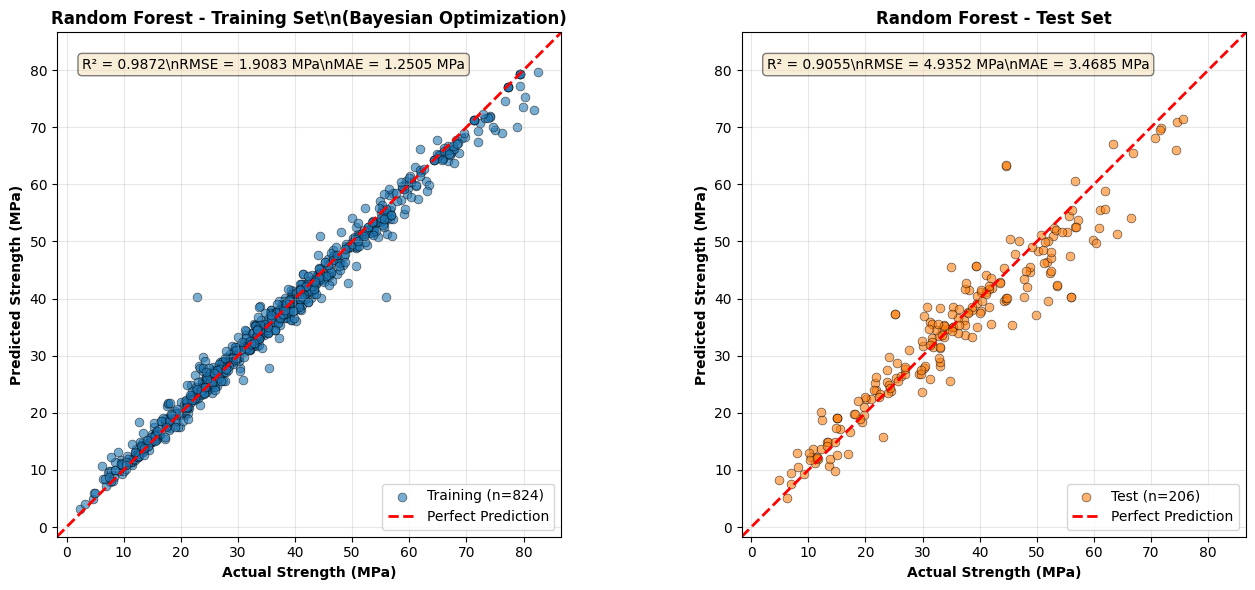

Random Forest - Bayesian Optimization Performance
------------------------------------------------------------
Training: R² = 0.9872, RMSE = 1.9083 MPa, MAE = 1.2505 MPa
Test:     R² = 0.9055, RMSE = 4.9352 MPa, MAE = 3.4685 MPa
Plot saved: rf_bayes_prediction_scatter.png\n
XGBOOST - Predicted vs Actual Scatter Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

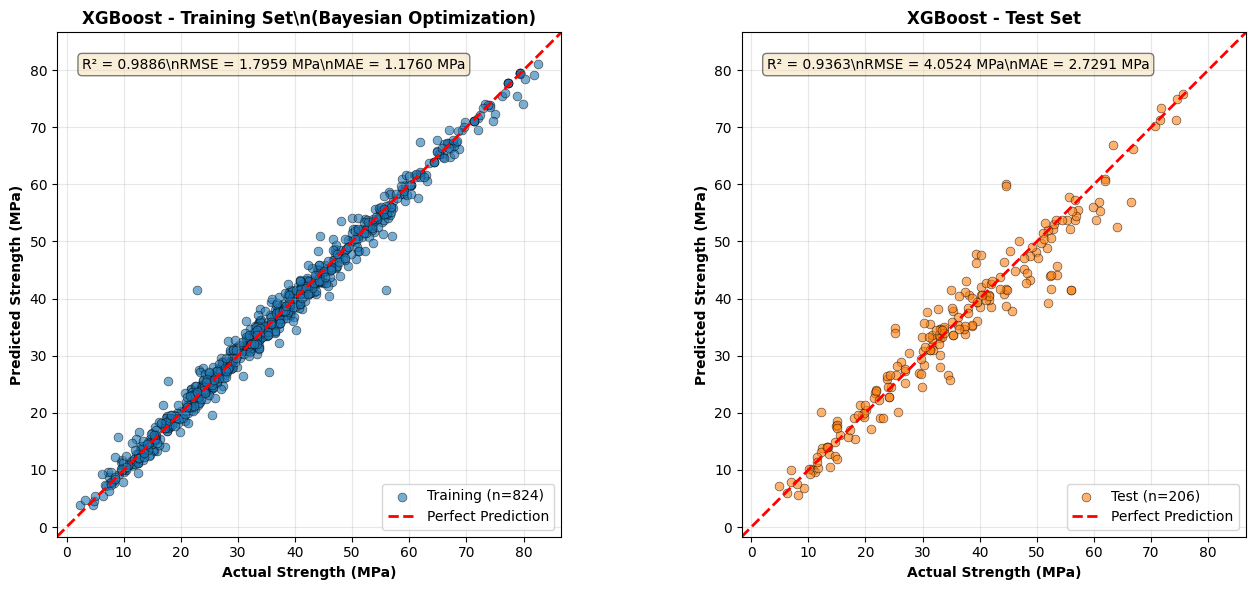

XGBoost - Bayesian Optimization Performance
------------------------------------------------------------
Training: R² = 0.9886, RMSE = 1.7959 MPa, MAE = 1.1760 MPa
Test:     R² = 0.9363, RMSE = 4.0524 MPa, MAE = 2.7291 MPa
Plot saved: xgb_bayes_prediction_scatter.png\n
SVR - Predicted vs Actual Scatter Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

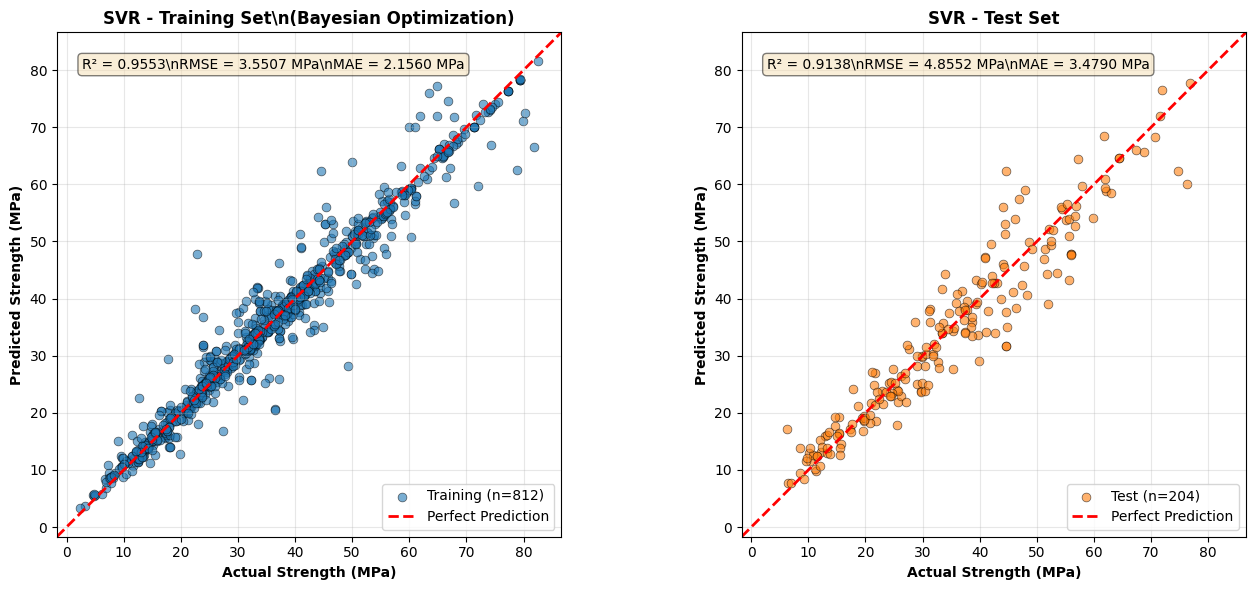

SVR - Bayesian Optimization Performance
------------------------------------------------------------
Training: R² = 0.9553, RMSE = 3.5507 MPa, MAE = 2.1560 MPa
Test:     R² = 0.9138, RMSE = 4.8552 MPa, MAE = 3.4790 MPa
Plot saved: svr_bayes_prediction_scatter.png\n
All prediction scatter plots generated successfully!


In [48]:
def create_prediction_scatter_plot(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name, filename):
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Calculate axis limits
    max_val = max(max(y_true_train), max(y_pred_train), 
                  max(y_true_test), max(y_pred_test))
    min_val = min(min(y_true_train), min(y_pred_train), 
                  min(y_true_test), min(y_pred_test))
    buffer = (max_val - min_val) * 0.05
    xylim_min = min_val - buffer
    xylim_max = max_val + buffer
    
    # Training Set
    r2_train = r2_score(y_true_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    
    ax1.scatter(y_true_train, y_pred_train, alpha=0.6, s=40, c='#1f77b4', edgecolors='k', linewidth=0.5, label=f'Training (n={len(y_true_train)})')
    ax1.plot([xylim_min, xylim_max], [xylim_min, xylim_max], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Add metrics box
    train_text = f'R² = {r2_train:.4f}\\nRMSE = {rmse_train:.4f} MPa\\nMAE = {mae_train:.4f} MPa'
    ax1.text(0.05, 0.95, train_text, transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax1.set_xlabel('Actual Strength (MPa)', fontweight='bold')
    ax1.set_ylabel('Predicted Strength (MPa)', fontweight='bold')
    ax1.set_title(f'{model_name} - Training Set\\n(Bayesian Optimization)', fontweight='bold')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(xylim_min, xylim_max)
    ax1.set_ylim(xylim_min, xylim_max)
    ax1.set_aspect('equal')
    
    # Test Set
    r2_test = r2_score(y_true_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    mae_test = mean_absolute_error(y_true_test, y_pred_test)
    
    ax2.scatter(y_true_test, y_pred_test, alpha=0.6, s=40, c='#ff7f0e', edgecolors='k', linewidth=0.5, label=f'Test (n={len(y_true_test)})')
    ax2.plot([xylim_min, xylim_max], [xylim_min, xylim_max], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Add metrics box
    test_text = f'R² = {r2_test:.4f}\\nRMSE = {rmse_test:.4f} MPa\\nMAE = {mae_test:.4f} MPa'
    ax2.text(0.05, 0.95, test_text, transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax2.set_xlabel('Actual Strength (MPa)', fontweight='bold')
    ax2.set_ylabel('Predicted Strength (MPa)', fontweight='bold')
    ax2.set_title(f'{model_name} - Test Set', fontweight='bold')
    ax2.legend(loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(xylim_min, xylim_max)
    ax2.set_ylim(xylim_min, xylim_max)
    ax2.set_aspect('equal')
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"{model_name} - Bayesian Optimization Performance")
    print("-" * 60)
    print(f"Training: R² = {r2_train:.4f}, RMSE = {rmse_train:.4f} MPa, MAE = {mae_train:.4f} MPa")
    print(f"Test:     R² = {r2_test:.4f}, RMSE = {rmse_test:.4f} MPa, MAE = {mae_test:.4f} MPa")
    print(f"Plot saved: {filename}\\n")

# Generate plots for all three models

# 1. RANDOM FOREST
print("RANDOM FOREST - Predicted vs Actual Scatter Plot")
create_prediction_scatter_plot(
    y_true_train=y_train_with,
    y_pred_train=rf_train_pred_bayes,
    y_true_test=y_test_with,
    y_pred_test=rf_test_pred_bayes,
    model_name="Random Forest",
    filename="rf_bayes_prediction_scatter.png"
)

# 2. XGBOOST
print("XGBOOST - Predicted vs Actual Scatter Plot")
create_prediction_scatter_plot(
    y_true_train=y_train_with,
    y_pred_train=xgb_bayes_train_pred,
    y_true_test=y_test_with,
    y_pred_test=xgb_bayes_test_pred,
    model_name="XGBoost",
    filename="xgb_bayes_prediction_scatter.png"
)

# 3. SVR
print("SVR - Predicted vs Actual Scatter Plot")
create_prediction_scatter_plot(
    y_true_train=y_train_clean, 
    y_pred_train=svr_train_pred_bayes,
    y_true_test=y_test_clean,    
    y_pred_test=svr_test_pred_bayes,
    model_name="SVR",
    filename="svr_bayes_prediction_scatter.png"
)

print("All prediction scatter plots generated successfully!")

# SECTION 14: TAYLOR DIAGRAM

NORMALIZED TAYLOR DIAGRAM - BAYESIAN OPTIMIZATION



<IPython.core.display.Javascript object>

Reference Standard Deviation: 16.0523 MPa
(All values will be normalized by this reference)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Normalized Model Statistics:
----------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost    | Std (normalized): 0.960 | Corr: 0.968


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RF         | Std (normalized): 0.902 | Corr: 0.954


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR        | Std (normalized): 0.994 | Corr: 0.956


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

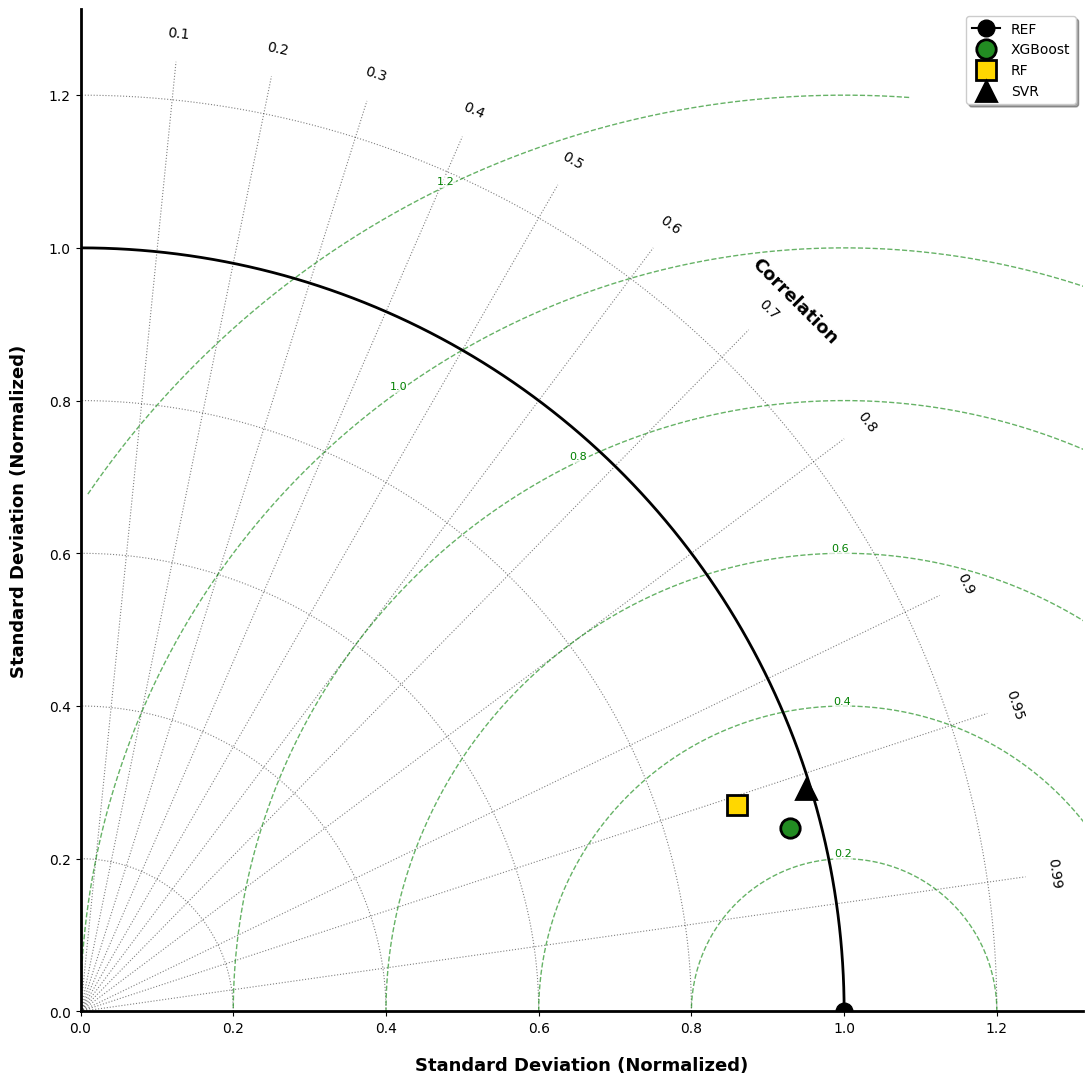


Chart saved to taylor_diagram_normalized.png
COMPLETE!


In [49]:
def taylor_diagram_normalized(models_data, ref_std, filename="taylor_diagram_normalized.png", figsize=(10, 10)):
    normalized_stds = [np.std(m['y_pred']) / ref_std for m in models_data.values()] + [1.0]
    max_std = max(normalized_stds) * 1.15
    max_std = np.ceil(max_std * 4) / 4  # Round to nearest 0.25

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, aspect='equal')
    
    ax.set_xlim(0, max_std * 1.05)
    ax.set_ylim(0, max_std * 1.05)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    ax.set_xlabel('Standard Deviation (Normalized)', fontweight='bold', fontsize=13, labelpad=15)
    ax.set_ylabel('Standard Deviation (Normalized)', fontweight='bold', fontsize=13, labelpad=15)

    # Standard Deviation Arcs
    std_ticks = np.arange(0, max_std + 0.05, 0.2)  # Every 0.2 for normalized
    theta = np.linspace(0, np.pi/2, 100)
    
    for r in std_ticks[1:]:
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        ax.plot(x, y, 'k:', lw=0.8, alpha=0.5)
    
    # Correlation Rays
    correlations = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    
    for corr in correlations:
        angle = np.arccos(corr)
        x_end = max_std * np.cos(angle)
        y_end = max_std * np.sin(angle)
        ax.plot([0, x_end], [0, y_end], 'k:', lw=0.8, alpha=0.5)
        
        # Labels
        t_x = (max_std * 1.03) * np.cos(angle)
        t_y = (max_std * 1.03) * np.sin(angle)
        rotation = np.degrees(angle) - 90
        ax.text(t_x, t_y, f"{corr}", rotation=rotation, ha='center', va='center', fontsize=10)

    ax.text(max_std*0.7, max_std*0.7, "Correlation", rotation=-45, fontsize=13, fontweight='bold', color='k')

    # RMSE Contours (normalized)
    rmse_levels = np.arange(0.2, max_std, 0.2)
    t = np.linspace(0, np.pi, 200)
    
    for rmse in rmse_levels:
        cx = 1.0 + rmse * np.cos(t)
        cy = rmse * np.sin(t)
        
        mask = (cx >= 0) & (cy >= 0) & (np.sqrt(cx**2 + cy**2) <= max_std * 1.3)
        
        if np.any(mask):
            ax.plot(cx[mask], cy[mask], color='green', linestyle='--', linewidth=1, alpha=0.6)
            
            mid_idx = len(cx[mask]) // 2
            if mid_idx < len(cx) and cx[mask][mid_idx] < max_std:
                ax.text(cx[mask][mid_idx], cy[mask][mid_idx], f'{rmse:.1f}', color='green', fontsize=8, ha='center', va='bottom',bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))
    
    ax.plot(1.0, 0, marker='o', color='black', markersize=12, label='REF', zorder=10)

    ax.plot(1.0 * np.cos(theta), 1.0 * np.sin(theta), 'k-', lw=2, label='_nolegend_')

    # Plot Models
    print("Normalized Model Statistics:")
    print("-" * 70)
    
    for model_name, data in models_data.items():
        y_true = np.array(data['y_true'])
        y_pred = np.array(data['y_pred'])
        
        std = np.std(y_pred)
        corr = np.corrcoef(y_true, y_pred)[0, 1]
        
        std_normalized = std / ref_std

        angle = np.arccos(np.clip(corr, -1, 1))
        x = std_normalized * np.cos(angle)
        y = std_normalized * np.sin(angle)
        
        # Plot
        ax.plot(x, y, marker=data['marker'], color=data['color'], markersize=14, linestyle='', markeredgecolor='k', markeredgewidth=2, label=model_name, zorder=11)
        
        print(f"{model_name:10} | Std (normalized): {std_normalized:.3f} | Corr: {corr:.3f}")

    # Legend
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"\nChart saved to {filename}")

print("NORMALIZED TAYLOR DIAGRAM - BAYESIAN OPTIMIZATION")
print()

ref_std = np.std(y_test_with)
print(f"Reference Standard Deviation: {ref_std:.4f} MPa")
print(f"(All values will be normalized by this reference)\n")

models_comparison = {
    'XGBoost': {
        'y_true': y_test_with,
        'y_pred': xgb_bayes_test_pred,
        'color': '#228B22',
        'marker': 'o'
    },
    'RF': {
        'y_true': y_test_with,
        'y_pred': rf_test_pred_bayes,
        'color': '#FFD700',
        'marker': 's'
    },
    'SVR': {
        'y_true': y_test_clean,
        'y_pred': svr_test_pred_bayes,
        'color': '#000000',
        'marker': '^'
    }
}

taylor_diagram_normalized(models_comparison, ref_std=ref_std, filename="taylor_diagram_normalized.png", figsize=(11, 11))

print("COMPLETE!")

# SECTION 15.1: RANDOM FOREST - FEATURE IMPORTANCE (SHAP)

RANDOM FOREST - SHAP Analysis (Bayesian Optimization)
Features being analyzed: ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'water_cement_ratio', 'water_binder_ratio', 'age_bin', 'is_very_early', 'is_early_cure', 'is_7day', 'is_28day', 'is_mature', 'is_very_mature', 'has_slag', 'has_ash', 'has_superplasticizer']



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

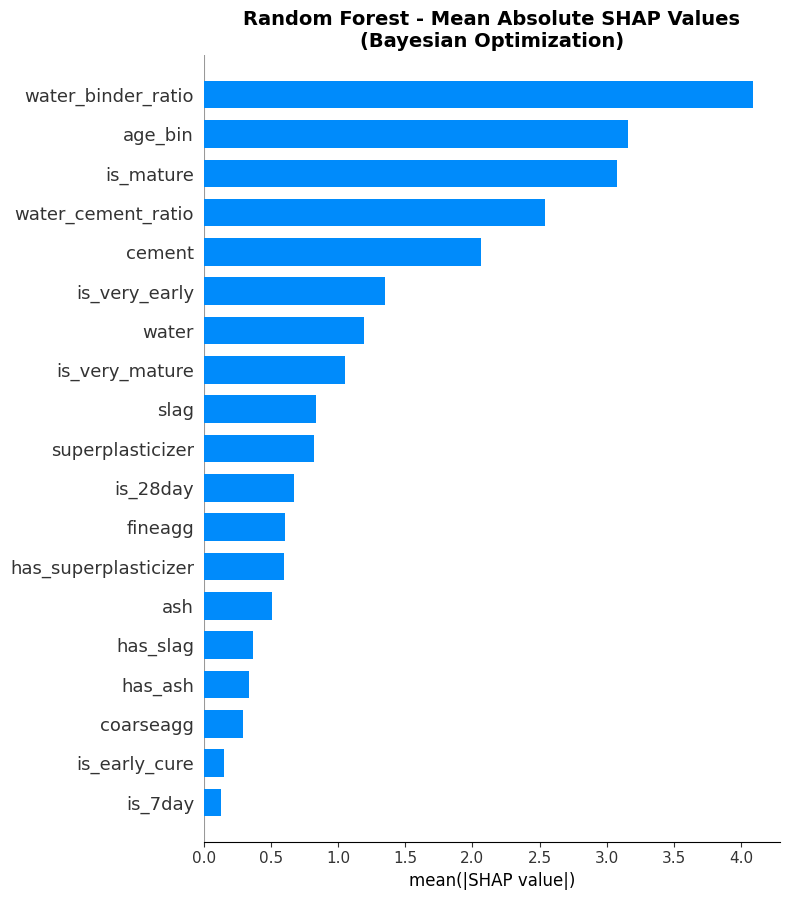

Random Forest - Feature Importance plot saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

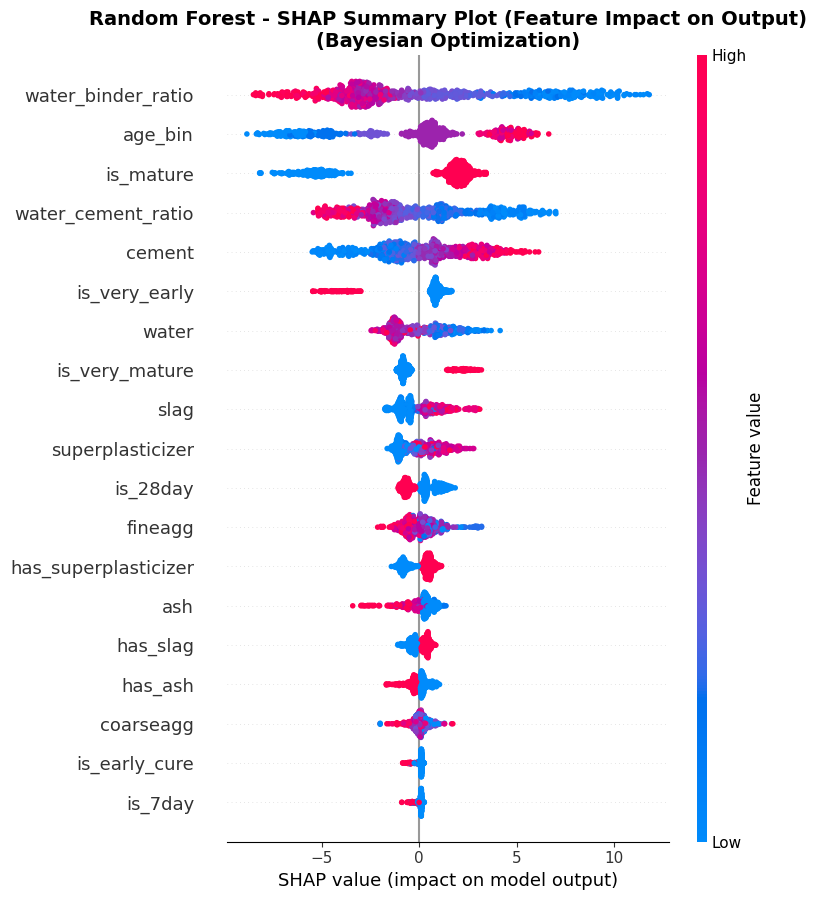

Random Forest - SHAP Summary plot saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x400 with 0 Axes>

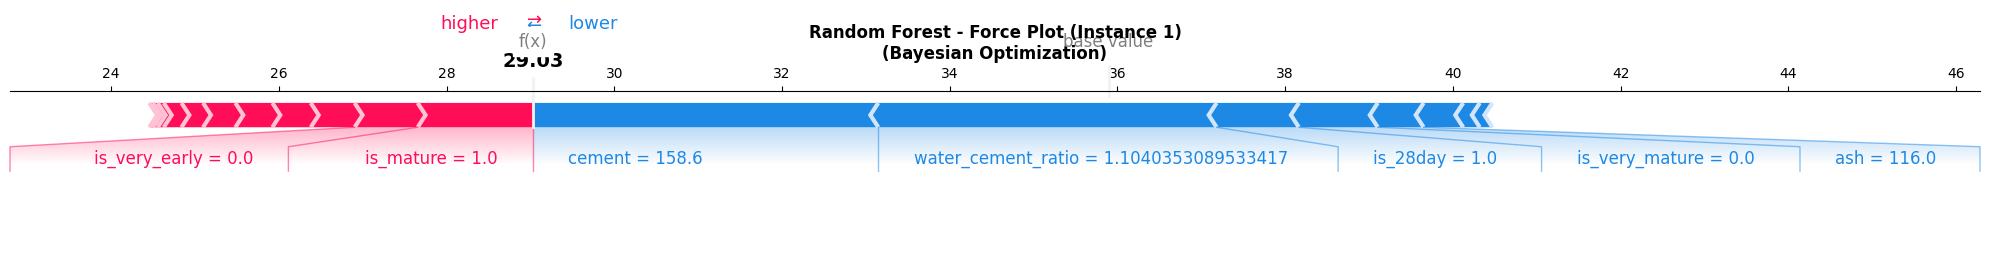

Random Forest - Force plot saved



In [50]:
feature_names = X_train_with.columns.tolist()

print("RANDOM FOREST - SHAP Analysis (Bayesian Optimization)")
print(f"Features being analyzed: {feature_names}\n")

explainer_rf = shap.TreeExplainer(best_rf_bayes.named_steps['rf'])
shap_values_rf = explainer_rf.shap_values(X_train_with)

# Plot 1: Random Forest - Mean Absolute SHAP Values (Feature Importance)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_train_with, feature_names=feature_names, plot_type="bar", show=False)
plt.title("Random Forest - Mean Absolute SHAP Values\n(Bayesian Optimization)", fontsize=14, fontweight='bold')
plt.xlabel("mean(|SHAP value|)", fontsize=12)
plt.tight_layout()
plt.savefig("rf_bayes_shap_importance.png", dpi=300, bbox_inches='tight')
plt.show()

print("Random Forest - Feature Importance plot saved")

# Plot 2: Random Forest - SHAP Summary Plot (Dependency)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_train_with, feature_names=feature_names, show=False)
plt.title("Random Forest - SHAP Summary Plot (Feature Impact on Output)\n(Bayesian Optimization)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("rf_bayes_shap_summary.png", dpi=300, bbox_inches='tight')
plt.show()

print("Random Forest - SHAP Summary plot saved")

# Plot 3: Random Forest - Force Plot (first instance)
plt.figure(figsize=(14, 4))
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0:1], X_train_with.iloc[0:1], feature_names=feature_names, matplotlib=True, show=False)
plt.title("Random Forest - Force Plot (Instance 1)\n(Bayesian Optimization)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig("rf_bayes_force_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("Random Forest - Force plot saved\n")

# SECTION 15.2: XGBOOST - FEATURE IMPORTANCE (SHAP)

XGBOOST - SHAP Analysis (Bayesian Optimization)
Features being analyzed: ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'water_cement_ratio', 'water_binder_ratio', 'age_bin', 'is_very_early', 'is_early_cure', 'is_7day', 'is_28day', 'is_mature', 'is_very_mature', 'has_slag', 'has_ash', 'has_superplasticizer']



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

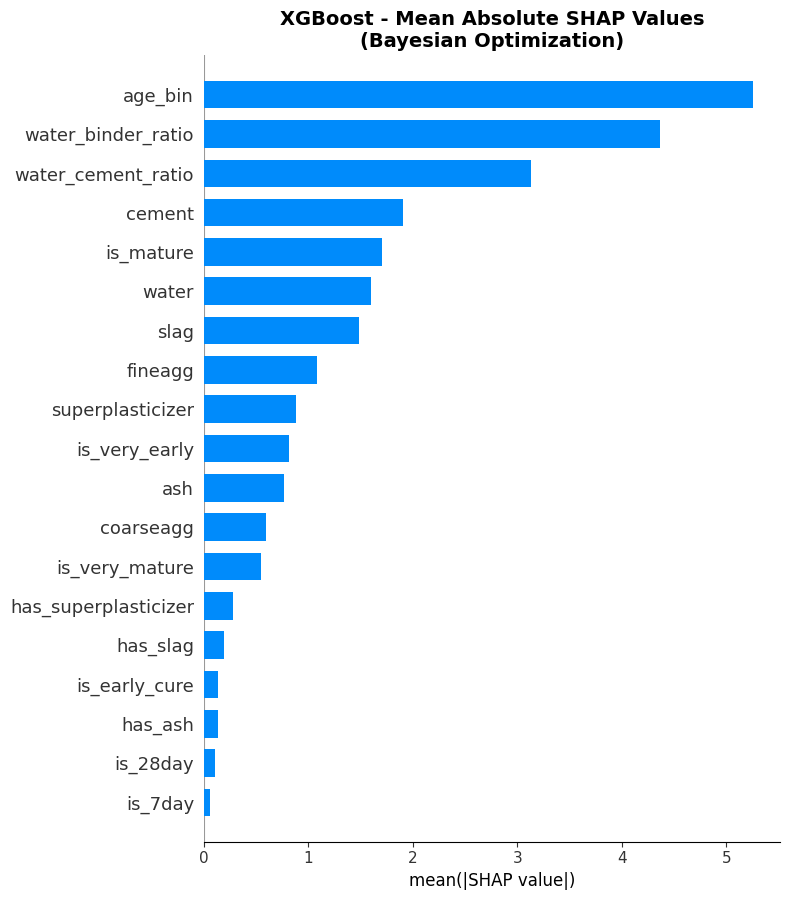

XGBoost - Feature Importance plot saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

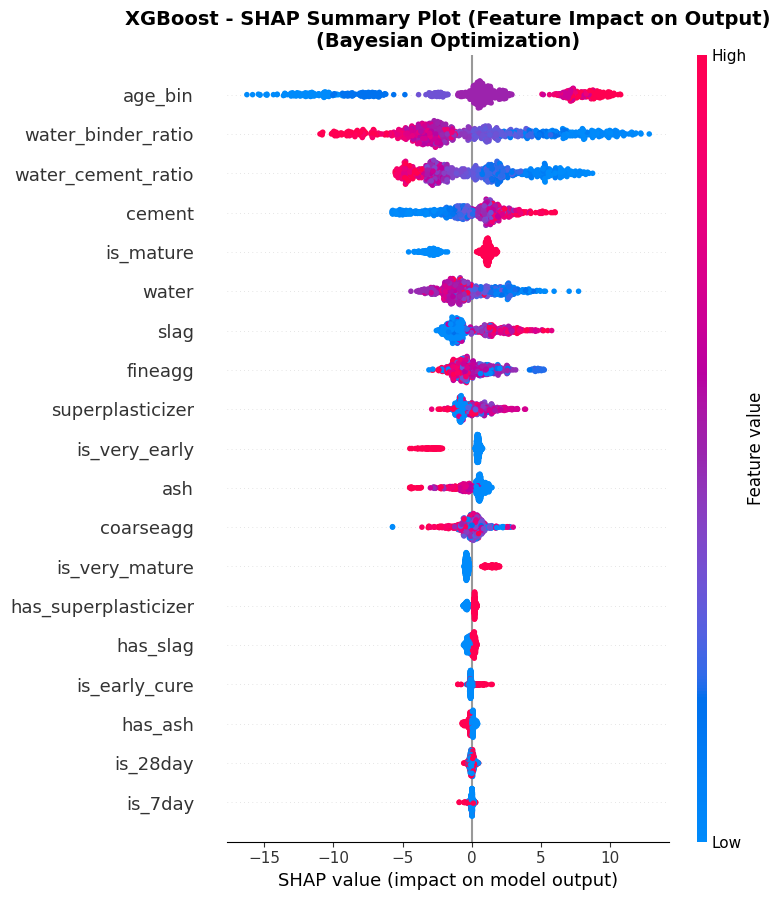

XGBoost - SHAP Summary plot saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x400 with 0 Axes>

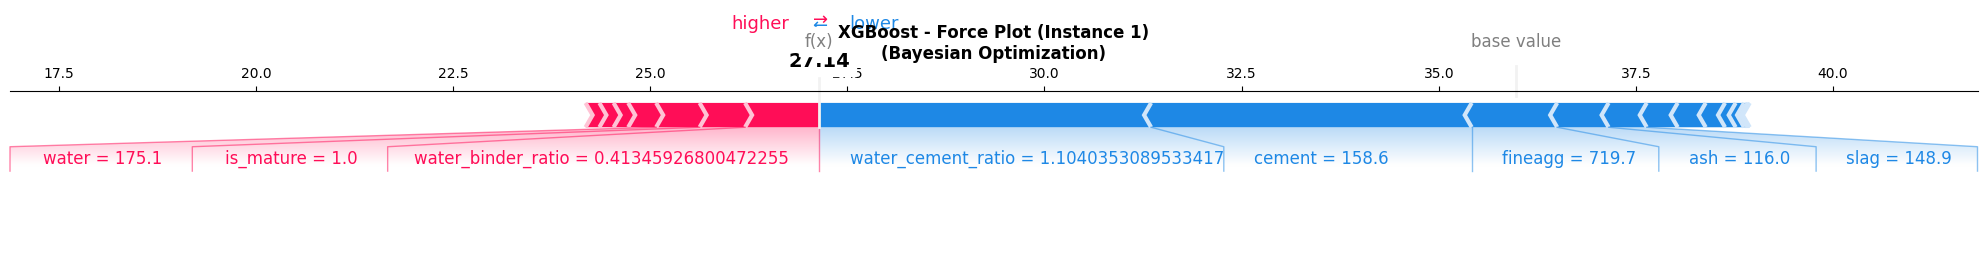

XGBoost - Force plot saved



In [51]:
feature_names = X_train_with.columns.tolist()

print("XGBOOST - SHAP Analysis (Bayesian Optimization)")
print(f"Features being analyzed: {feature_names}\n")

explainer_xgb = shap.TreeExplainer(best_xgb_bayes.named_steps['xgb'])
shap_values_xgb = explainer_xgb.shap_values(X_train_with)

# Plot 1: XGBoost - Mean Absolute SHAP Values (Feature Importance)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_train_with, feature_names=feature_names, plot_type="bar", show=False)
plt.title("XGBoost - Mean Absolute SHAP Values\n(Bayesian Optimization)", fontsize=14, fontweight='bold')
plt.xlabel("mean(|SHAP value|)", fontsize=12)
plt.tight_layout()
plt.savefig("xgb_bayes_shap_importance.png", dpi=300, bbox_inches='tight')
plt.show()

print("XGBoost - Feature Importance plot saved")

# Plot 2: XGBoost - SHAP Summary Plot (Dependency)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_xgb, X_train_with, feature_names=feature_names, show=False)
plt.title("XGBoost - SHAP Summary Plot (Feature Impact on Output)\n(Bayesian Optimization)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("xgb_bayes_shap_summary.png", dpi=300, bbox_inches='tight')
plt.show()

print("XGBoost - SHAP Summary plot saved")

# Plot 3: XGBoost - Force Plot (first instance)
plt.figure(figsize=(14, 4))
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0:1], X_train_with.iloc[0:1], feature_names=feature_names, matplotlib=True, show=False)
plt.title("XGBoost - Force Plot (Instance 1)\n(Bayesian Optimization)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig("xgb_bayes_force_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("XGBoost - Force plot saved\n")

# SECTION 15.3: SVR - FEATURE IMPORTANCE (SHAP)

In [52]:
N_SAMPLES_ANALYSIS = 100  
N_BACKGROUND_SAMPLES = 50 

feature_names_clean = X_train_clean.columns.tolist()

# Prepare Data
if len(X_train_clean) > N_SAMPLES_ANALYSIS:
    X_train_sample = X_train_clean.sample(n=N_SAMPLES_ANALYSIS, random_state=42)
else:
    X_train_sample = X_train_clean

print(f"SVR - SHAP Analysis running on {len(X_train_sample)} samples.")

def svr_predict_wrapper(data):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=feature_names_clean)
    return best_svr_bayes.predict(data)

print(f"Selecting {N_BACKGROUND_SAMPLES} random background samples...")
background_data = shap.sample(X_train_clean, N_BACKGROUND_SAMPLES)

print("Initializing KernelExplainer (Black Box Mode)...")
explainer_svr = shap.KernelExplainer(svr_predict_wrapper, background_data)

print("Calculating SHAP values... (This allows for a progress bar)")
shap_values_svr = explainer_svr.shap_values(X_train_sample, nsamples="auto")

# Plot A: Feature Importance (Bar)
print("Saving Feature Importance plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_svr, X_train_sample, feature_names=feature_names_clean, plot_type="bar", show=False)
plt.title("SVR - Feature Importance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("svr_shap_importance_sample.png", dpi=300)
plt.close()

# Plot B: Summary Plot (Beeswarm)
print("Saving Summary plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_svr, X_train_sample, feature_names=feature_names_clean, show=False)
plt.title("SVR - Feature Impact Directions", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("svr_shap_summary_sample.png", dpi=300)
plt.close()

# Plot C: Force Plot (Robust Implementation)
print("Saving Force plot...")
try:
    base_value = explainer_svr.expected_value
    if isinstance(base_value, (np.ndarray, list)):
        base_value = base_value[0]

    plt.figure(figsize=(14, 4))
    shap.force_plot(
        base_value, 
        shap_values_svr[0], 
        X_train_sample.iloc[0], 
        feature_names=feature_names_clean, 
        matplotlib=True, 
        show=False
    )
    plt.title("SVR - Prediction Logic for Instance #1", fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig("svr_force_plot_sample.png", dpi=300, bbox_inches='tight')
    plt.close()
except Exception as e:
    print(f"Could not generate Force Plot: {e}")

print("\nDONE. All plots saved.")

SVR - SHAP Analysis running on 100 samples.
Selecting 50 random background samples...
Initializing KernelExplainer (Black Box Mode)...
Calculating SHAP values... (This allows for a progress bar)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [17:49<00:00, 10.69s/it]


Saving Feature Importance plot...
Saving Summary plot...
Saving Force plot...

DONE. All plots saved.
